# 1.Packages & Data

In [ ]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

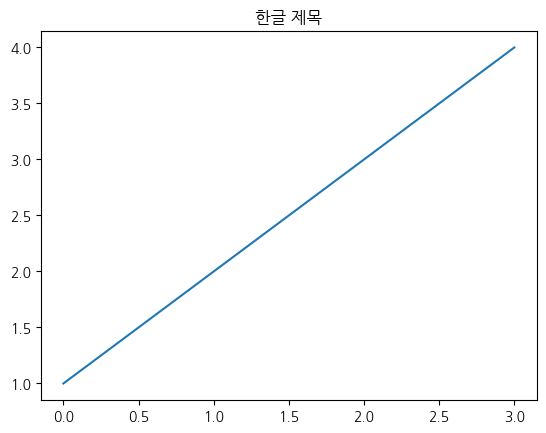

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import plotly.express as px
from numpy import random
import missingno

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import pydot
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [4]:
%cd /content/drive/MyDrive/Machine Learning project/Data

/content/drive/MyDrive/Machine Learning project/Data


In [6]:
amz_data=pd.read_csv('6.amz_data.csv')
amz_data.head()

,index,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


In [7]:
amz_data = amz_data.drop(['index'], axis=1, errors='ignore')
amz_data.head()

,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


## Meta Data
- index : 행 번호
- product 제품군
- name : 제품명
- mrp_now : 인도나 방글라데시에서 팔 수 있는 해당 제품의 최고 가격
- prcie_now : 현재 제품 가격
- star1~5 : 별점
- mrp_then : 이전 mrp
- prcie_then : 이전 mpr 시점 가격


In [8]:
# 컬럼별 데이터 타입 알아보기
amz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     737 non-null    object 
 1   name        737 non-null    object 
 2   mrp_now     277 non-null    float64
 3   price_now   277 non-null    float64
 4   star1       277 non-null    float64
 5   star2       277 non-null    float64
 6   star3       277 non-null    float64
 7   star4       277 non-null    float64
 8   star5       277 non-null    float64
 9   mrp_then    354 non-null    float64
 10  price_then  354 non-null    float64
dtypes: float64(9), object(2)
memory usage: 63.5+ KB


In [9]:
# 컬럼별 간단한 통계값 보기
amz_data.describe()

,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,354.000000,354.000000
mean,878.779783,454.971119,15.353791,3.285199,4.610108,7.498195,15.353791,3454.415254,1289.576271
std,1275.237633,775.001865,22.030227,7.871355,7.349922,10.935789,22.030227,7671.778390,2441.104903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,45.000000
25%,350.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,499.000000,259.500000
50%,500.000000,265.000000,0.000000,0.000000,0.000000,0.000000,0.000000,998.500000,499.000000
75%,999.000000,449.000000,31.000000,5.000000,9.000000,18.000000,31.000000,2600.000000,1199.750000
max,10360.000000,7246.000000,100.000000,100.000000,32.000000,50.000000,100.000000,60000.000000,22050.000000


In [10]:
# 결측값
missing_df = amz_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
9,mrp_then,383
10,price_then,383
2,mrp_now,460
3,price_now,460
4,star1,460
5,star2,460
6,star3,460
7,star4,460
8,star5,460


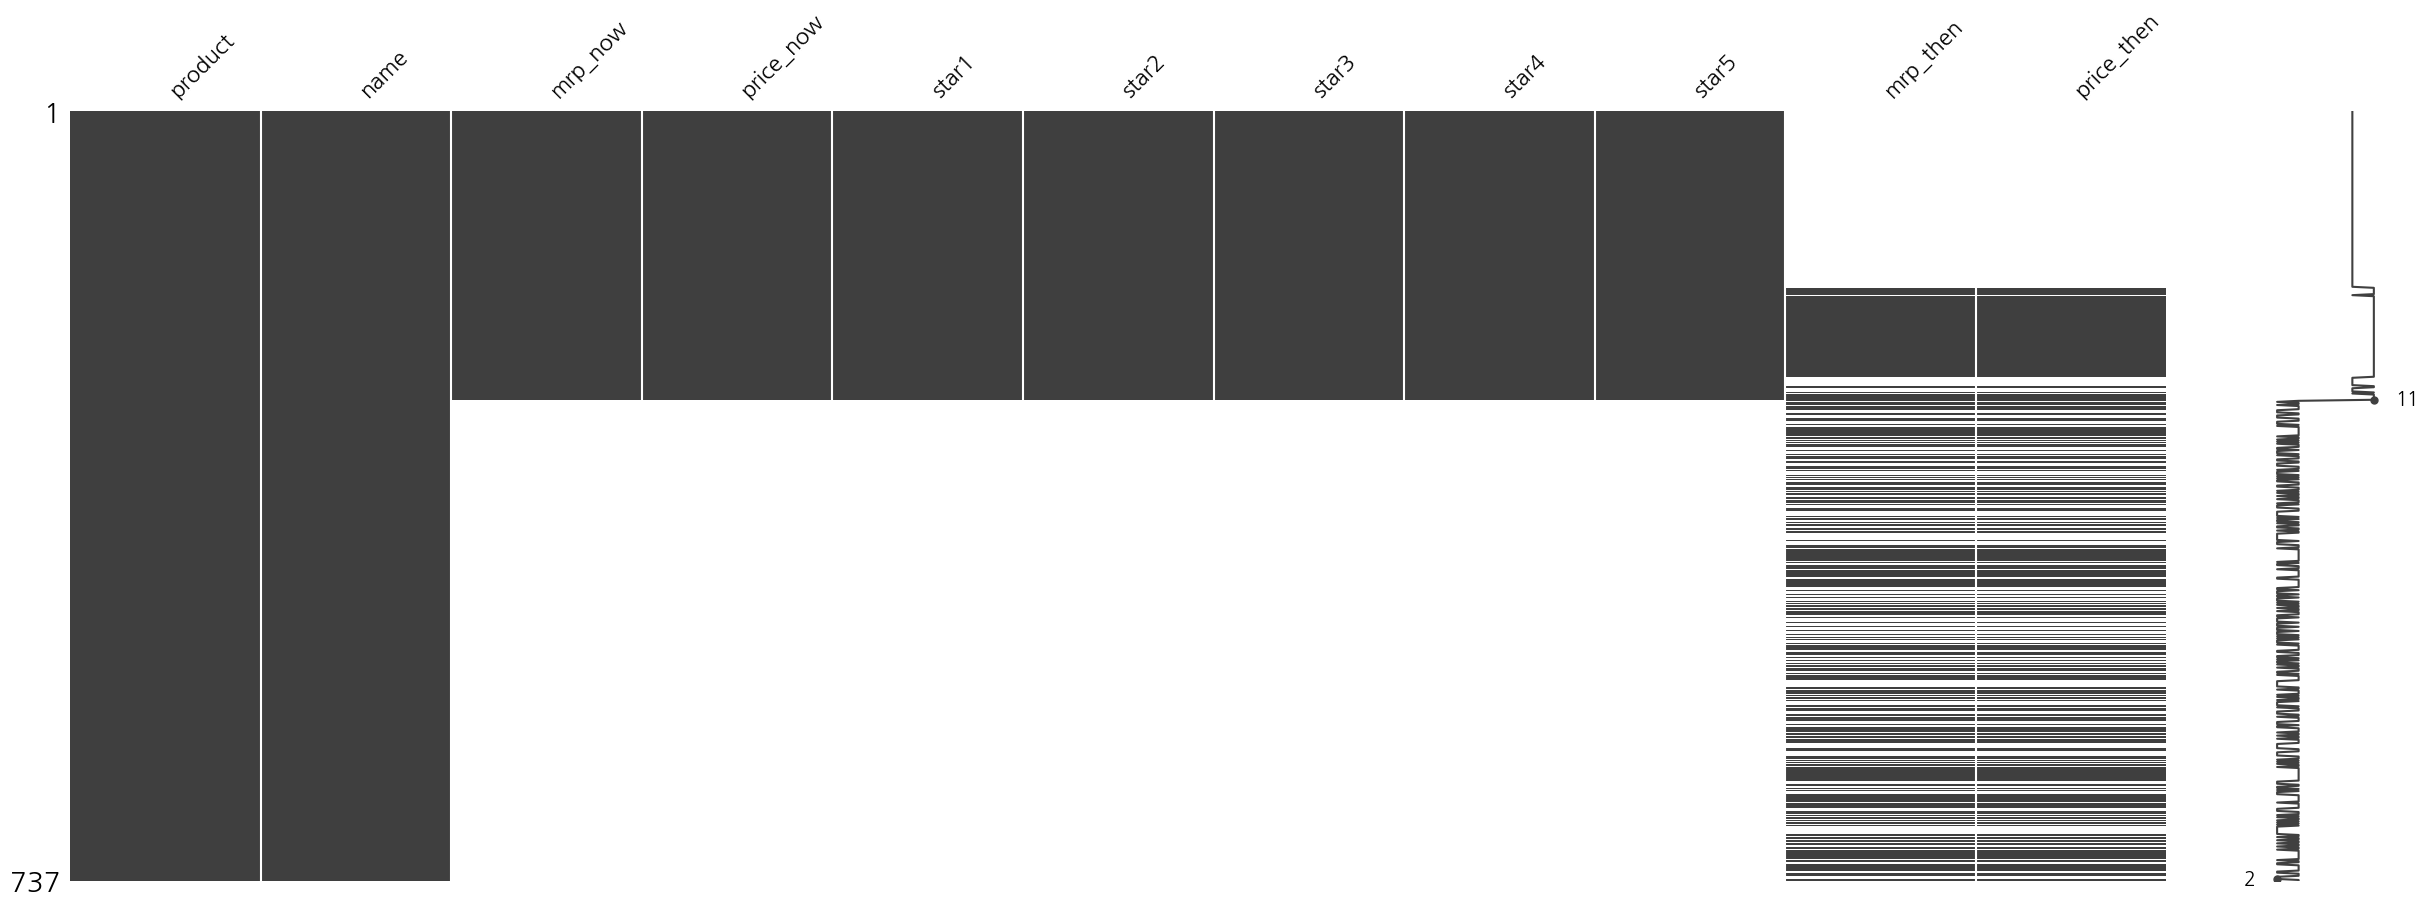

In [16]:
# missingno 패키지를 통해 확인
missingno.matrix(amz_data, figsize = (30,10));

In [17]:
# num_cols : 숫자형 컬럼의 총 개수
num_cols = amz_data.select_dtypes(include=np.number).shape[1]

# 숫자형 컬럼이 모두 NULL 인 행은 삭제
amz_data = amz_data[amz_data.select_dtypes(include=np.number).isnull().sum(axis=1)!=num_cols]

In [18]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(amz_data[amz_data.duplicated()]))

중복된 항목 수 : 1


In [19]:
# 중복된 항목 확인
amz_data[amz_data.duplicated(keep = False)].sort_values(by=list(amz_data.columns))

,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
370,medical equipment,Proexamine Surgicals® Cotton Reusable Ortho Su...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.0,649.0
422,medical equipment,Proexamine Surgicals® Cotton Reusable Ortho Su...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.0,649.0


In [20]:
# 중복된 항목 제거
amz_data.drop_duplicates(inplace=True, keep='first', ignore_index = True)

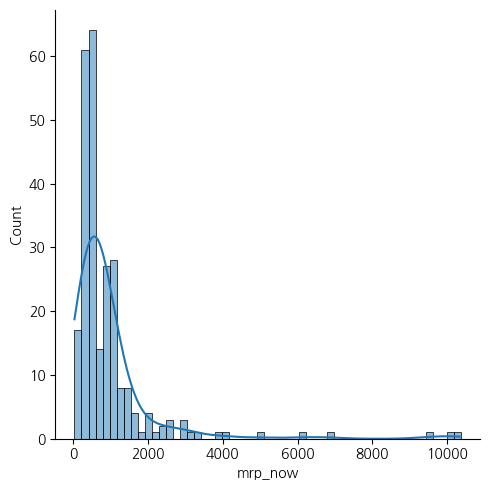

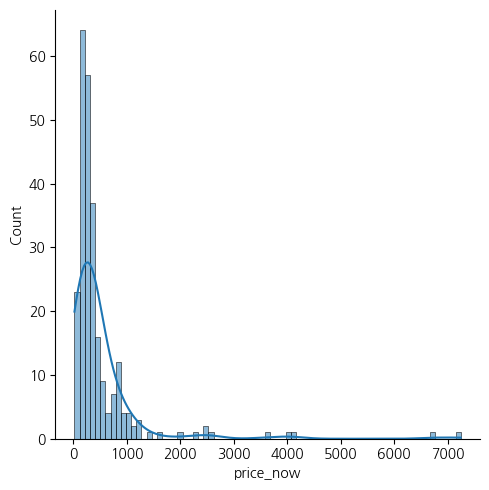

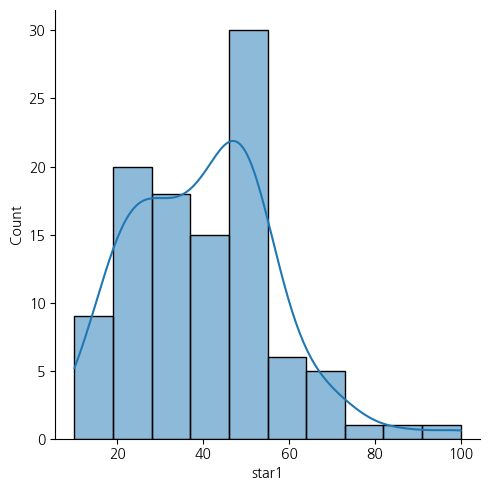

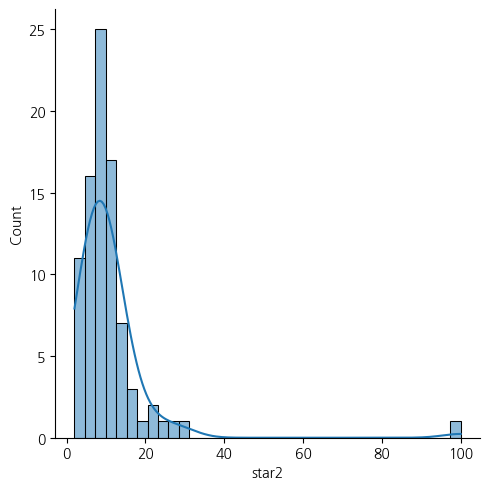

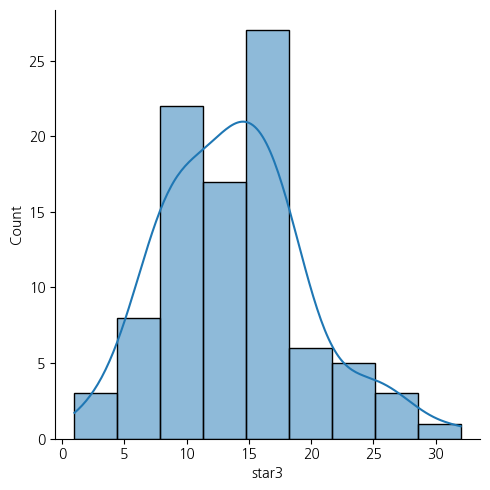

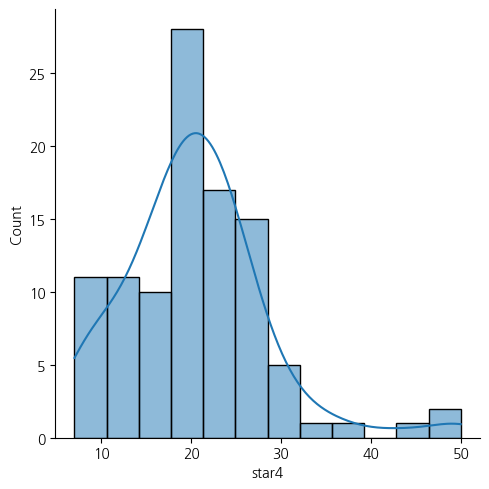

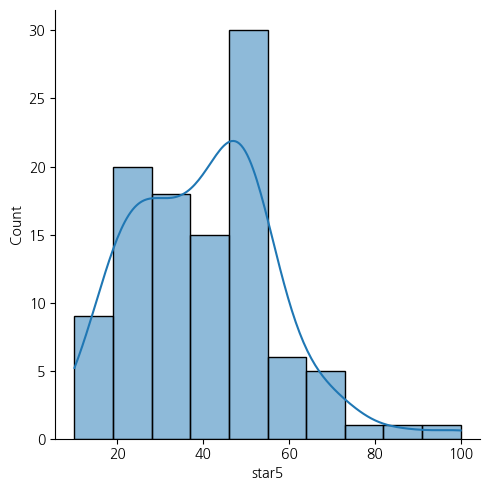

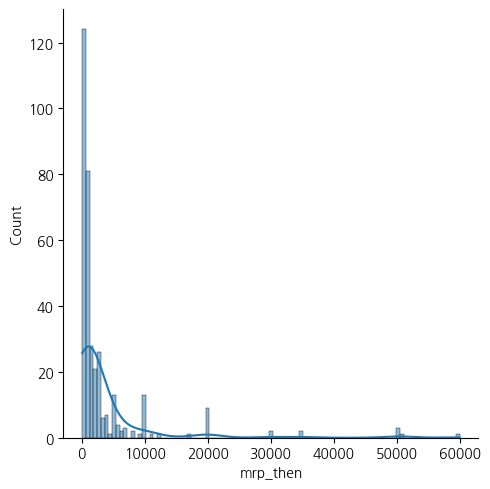

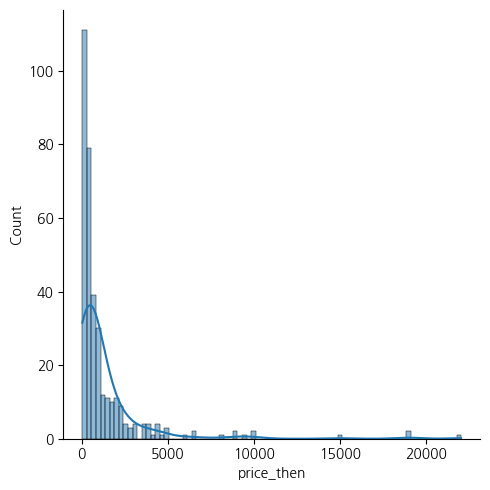

In [21]:
# 변수별 시각화(수치형)
# 데이터 컬럼 타입이 np.number 인 것만 가져오기
numeric_data = amz_data.select_dtypes(include=np.number)

# 데이터 컬럼 타입이 np.number 인 컬럼 이름들 가져오기
l = numeric_data.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns

# 컬럼별 히스토그램 그리기
for i in range(0,len(l)):
    target_data = numeric_data[l[i]]

    # 결측값에 채운 0 을 제외한 데이터 가져오기
    target_data_wo_zero = target_data[target_data>0]
    sns.displot(target_data_wo_zero,kde=True) # kde : kernel density

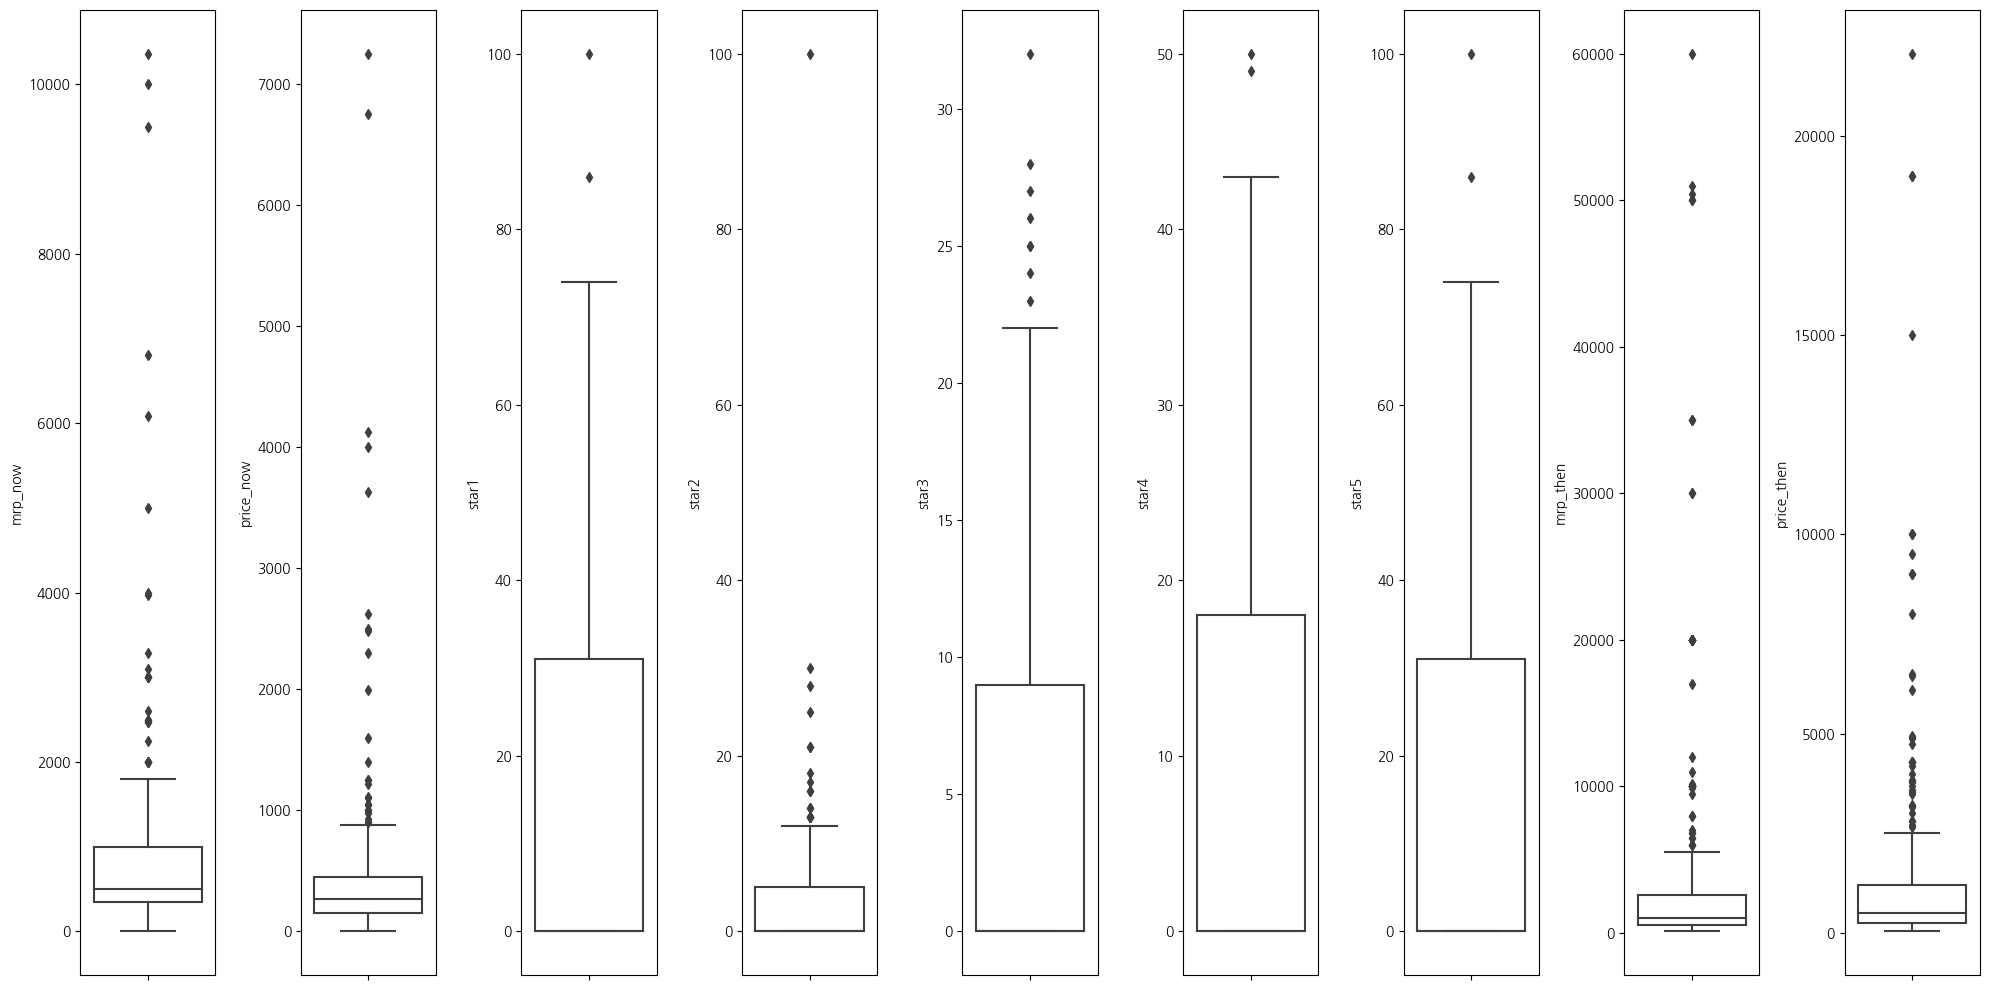

In [22]:
# 데이터 컬럼 타입이 np.number 인 컬럼들 가져오기
columns = amz_data.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=amz_data, boxprops={'facecolor': 'None'})
figure.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정한다.
plt.show()

In [23]:
print(amz_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     536 non-null    object 
 1   name        536 non-null    object 
 2   mrp_now     277 non-null    float64
 3   price_now   277 non-null    float64
 4   star1       277 non-null    float64
 5   star2       277 non-null    float64
 6   star3       277 non-null    float64
 7   star4       277 non-null    float64
 8   star5       277 non-null    float64
 9   mrp_then    353 non-null    float64
 10  price_then  353 non-null    float64
dtypes: float64(9), object(2)
memory usage: 46.2+ KB
None


In [24]:
# 데이터 타입별 컬럼 수 확인
dtype_data = amz_data.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0     float64      9
1      object      2


In [25]:
# pandas 의 select_dtypes('object') 사용
amz_data.select_dtypes(include=['number']).head()

,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


In [26]:
num_feat = amz_data.select_dtypes('number').columns.values
train_num = amz_data[num_feat].copy()

In [27]:
print(train_num.nunique().sort_values())

star2          22
star3          29
star4          30
star1          49
star5          49
mrp_now        91
mrp_then      132
price_now     148
price_then    193
dtype: int64


# 2.제품별 군집분석

## 2.1 K-means Clustering

In [28]:
amz_all=amz_data
amz_all=amz_all.reset_index()

In [29]:
prd_lists = list(amz_all['product'].unique())
prd_lists

['facemasks',
 'ppe',
 'ppekits',
 'handwash',
 'Bath & Shower',
 'Skin Care',
 'Grocery & Gourmet Foods',
 'medical equipment']

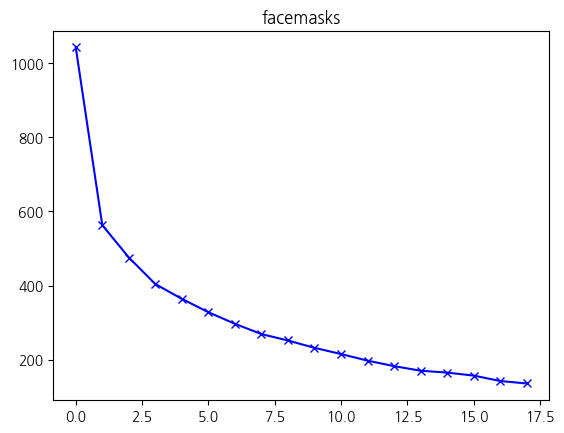

ppe : (<class 'ValueError'>, ValueError('n_samples=16 should be >= n_clusters=17.'), <traceback object at 0x7e9df060dac0>)
ppekits : (<class 'ValueError'>, ValueError('n_samples=3 should be >= n_clusters=4.'), <traceback object at 0x7e9df061a400>)
handwash : (<class 'ValueError'>, ValueError('n_samples=1 should be >= n_clusters=2.'), <traceback object at 0x7e9df060dac0>)
Bath & Shower : (<class 'ValueError'>, ValueError('n_samples=11 should be >= n_clusters=12.'), <traceback object at 0x7e9df0628a40>)


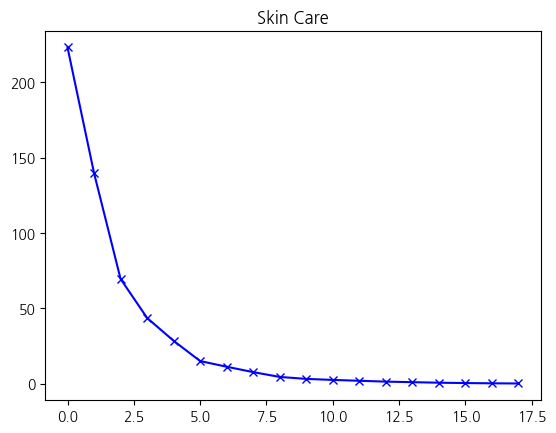

Grocery & Gourmet Foods : (<class 'ValueError'>, ValueError('n_samples=1 should be >= n_clusters=2.'), <traceback object at 0x7e9df09269c0>)


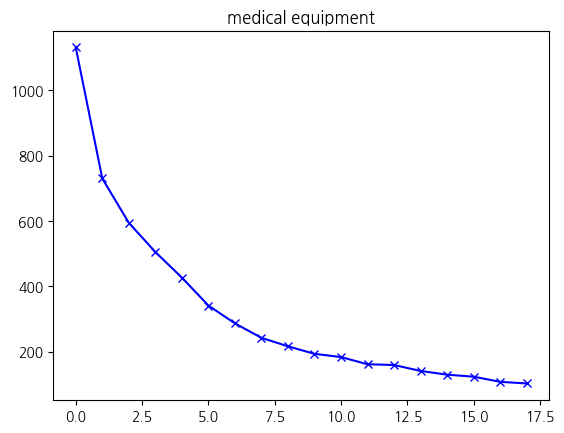

In [30]:
scaler = StandardScaler()
valid_prd_list = []

for prd in prd_lists:
    df_scaled = scaler.fit_transform(amz_all[['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']][amz_all['product']==prd])
    df_scaled=np.nan_to_num(df_scaled)
    wcss=[]
    try:
        for i in range(1,19):
            kmeans = KMeans(n_clusters= i)
            kmeans.fit(df_scaled)
            wcss.append(kmeans.inertia_)

        plt.title(prd)
        plt.plot(wcss, 'bx-')
        plt.show()
        valid_prd_list.append(prd)
    except:
        print(prd+' : '+str(sys.exc_info()))

## 2.2 제품-클러스터별 변수 분포도

facemasks


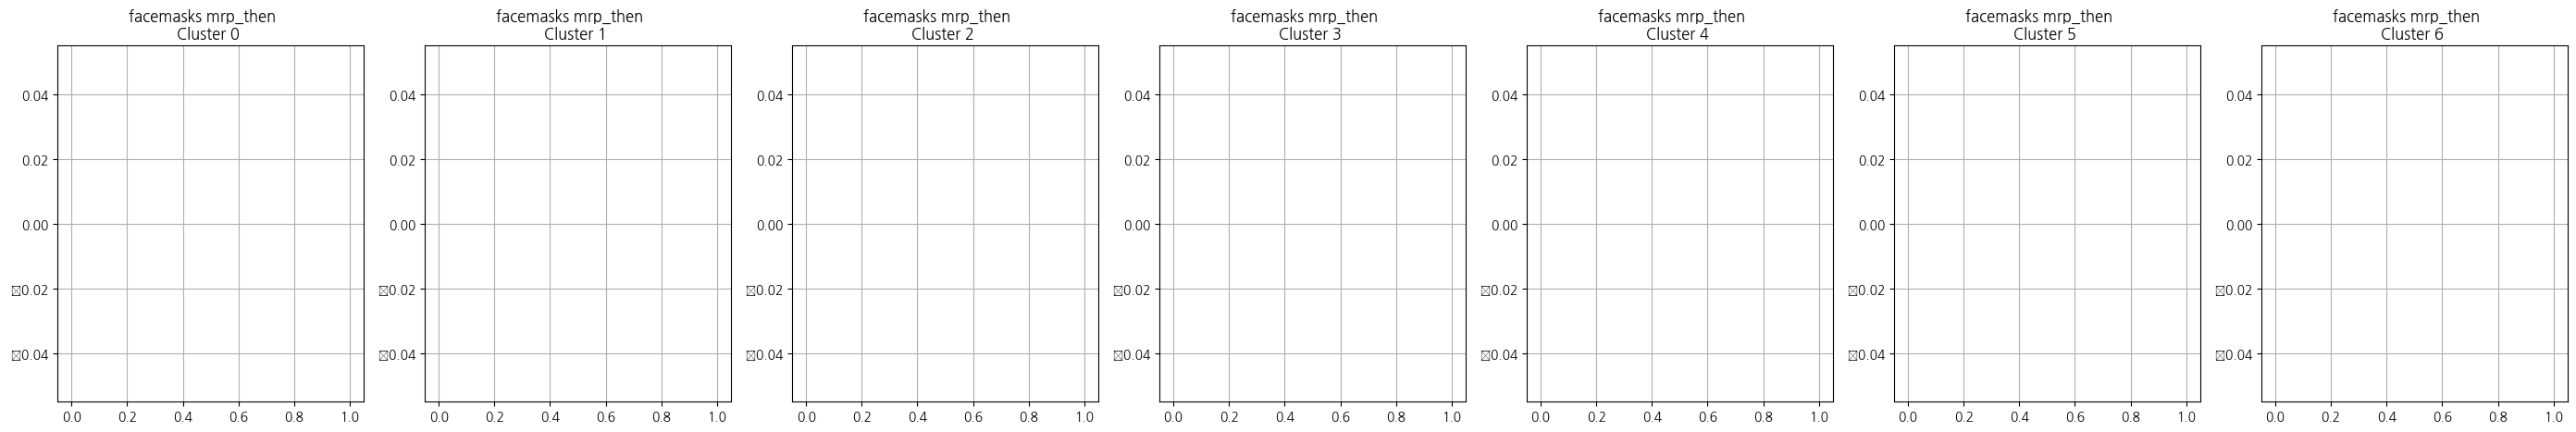

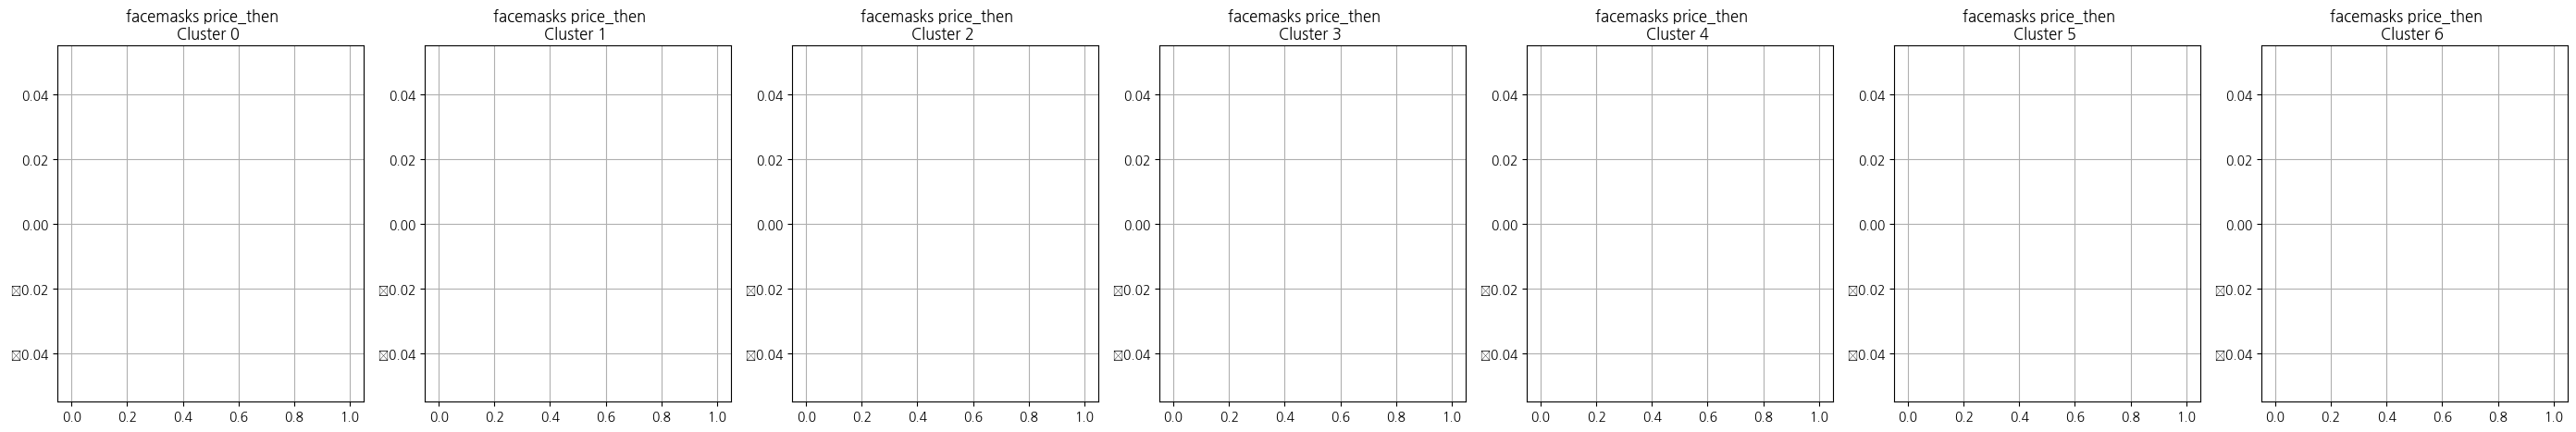

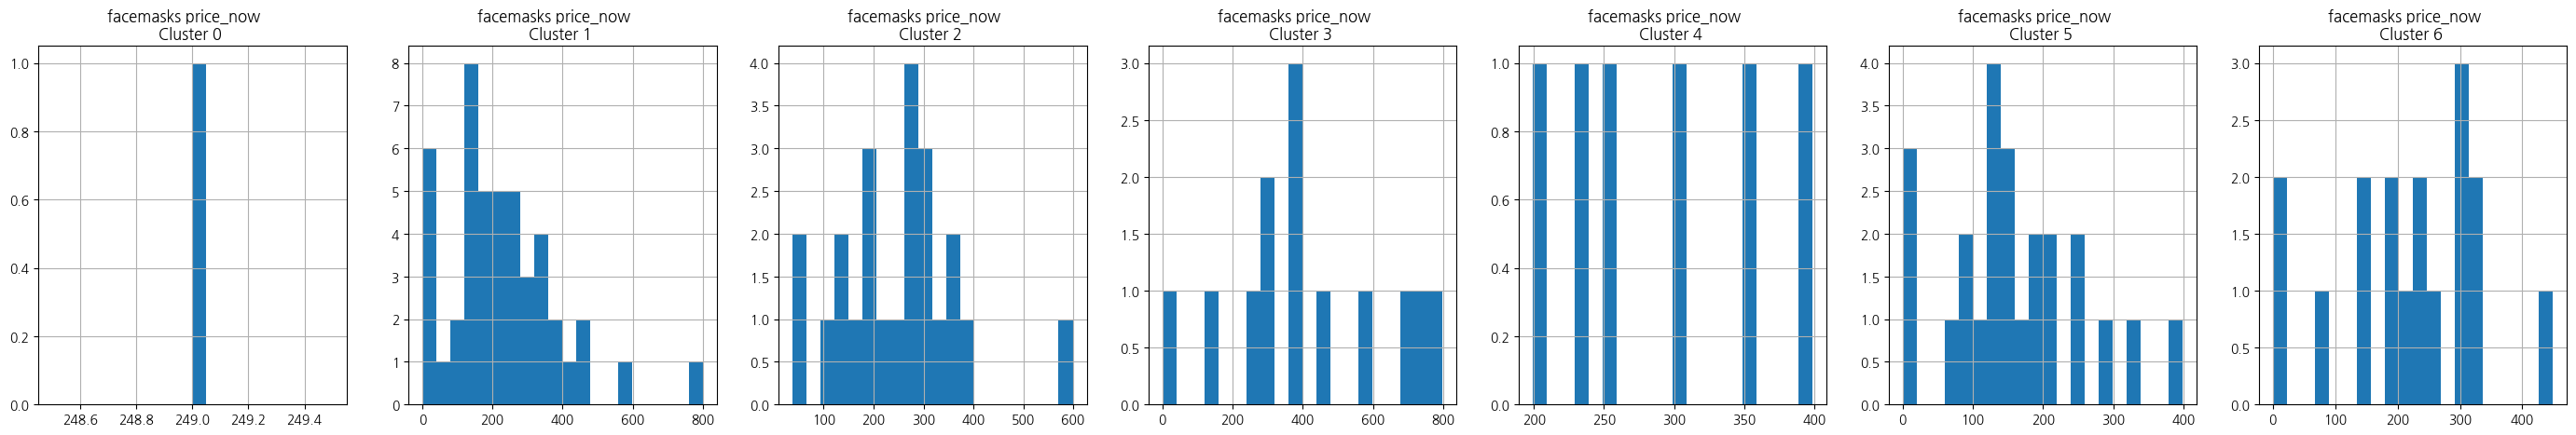

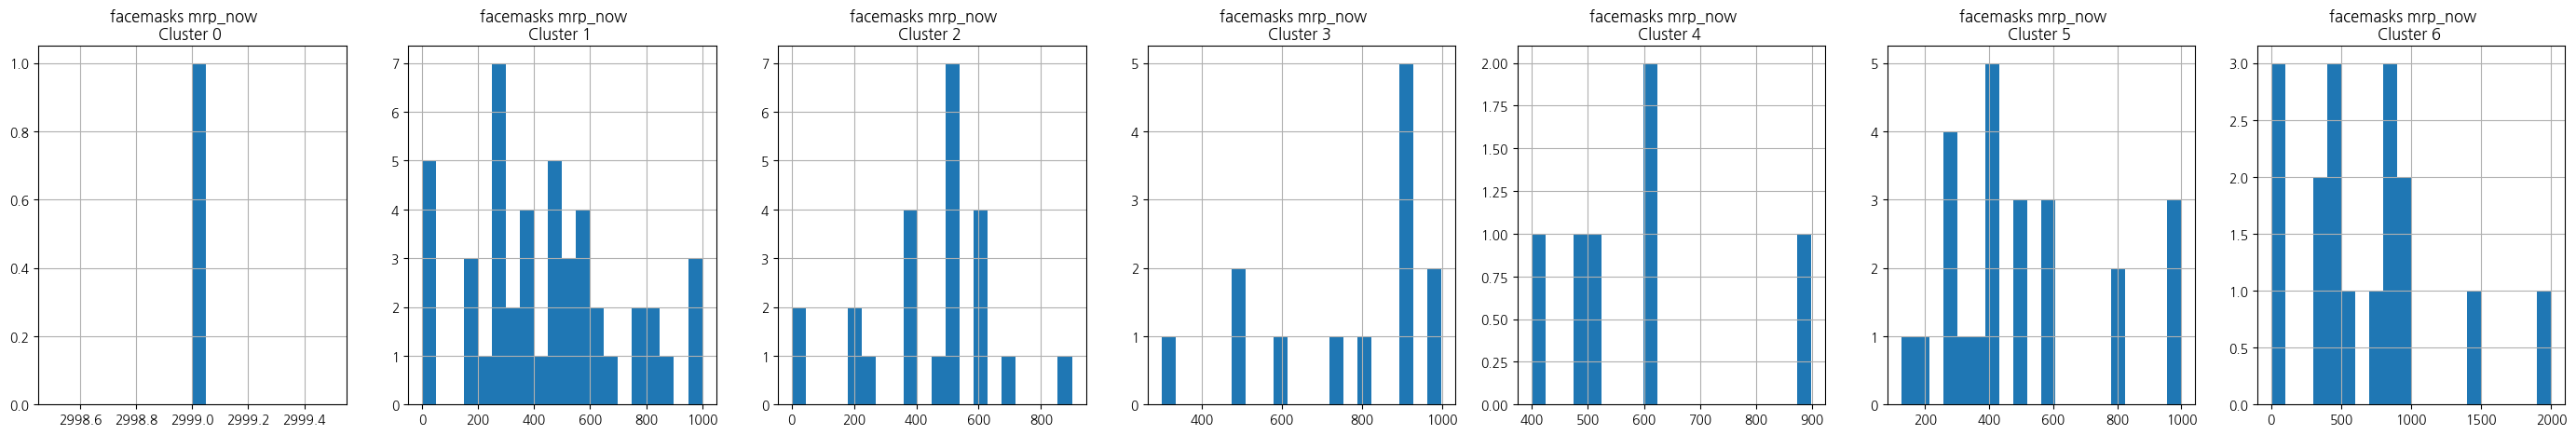

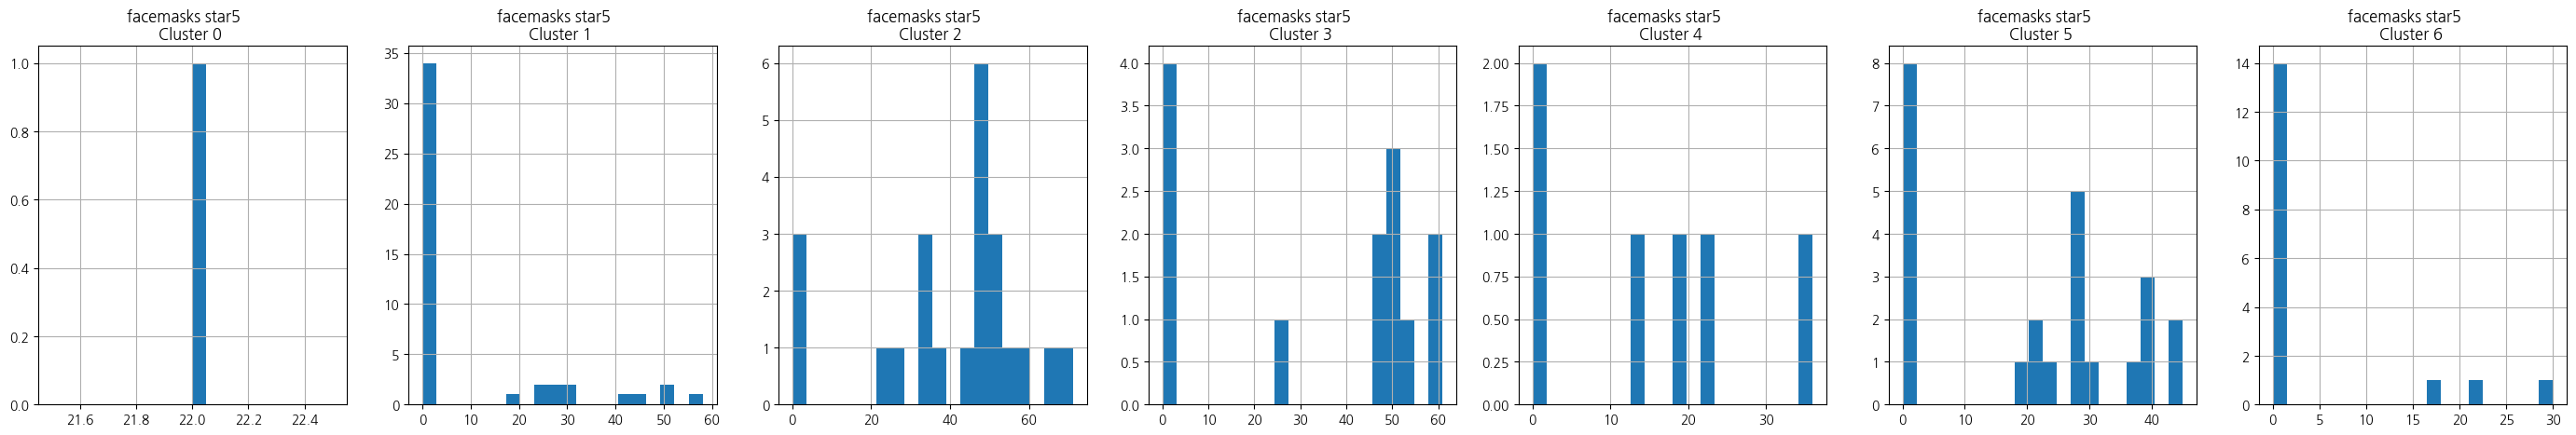

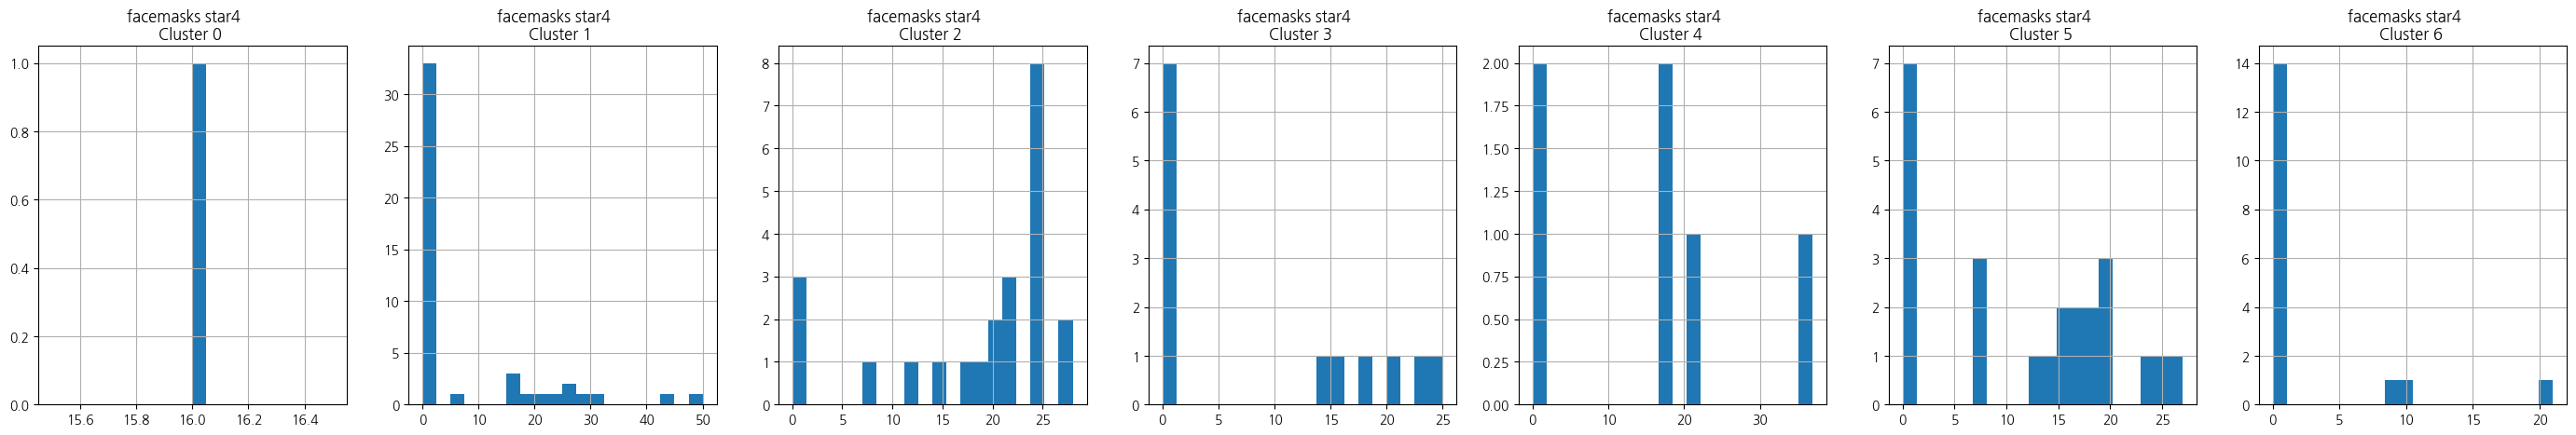

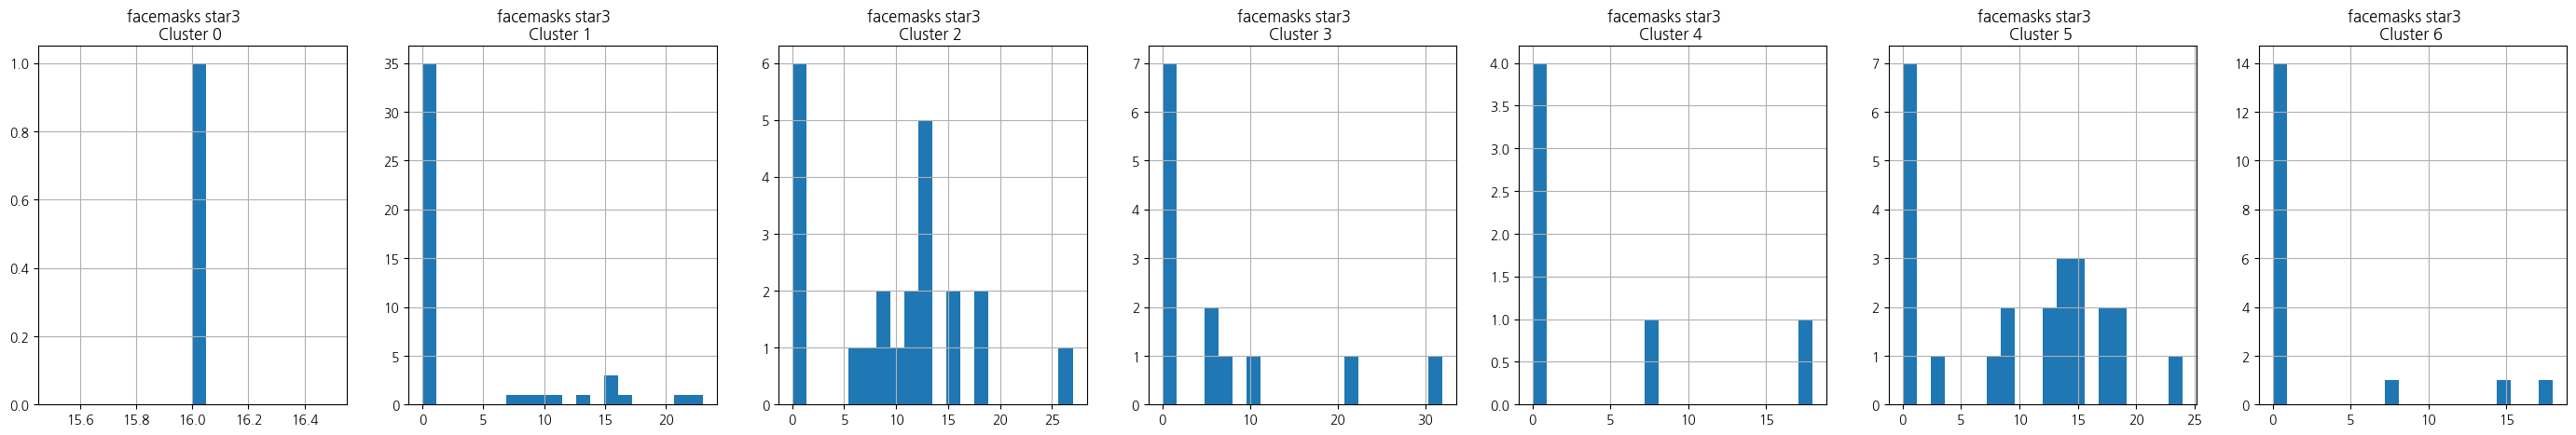

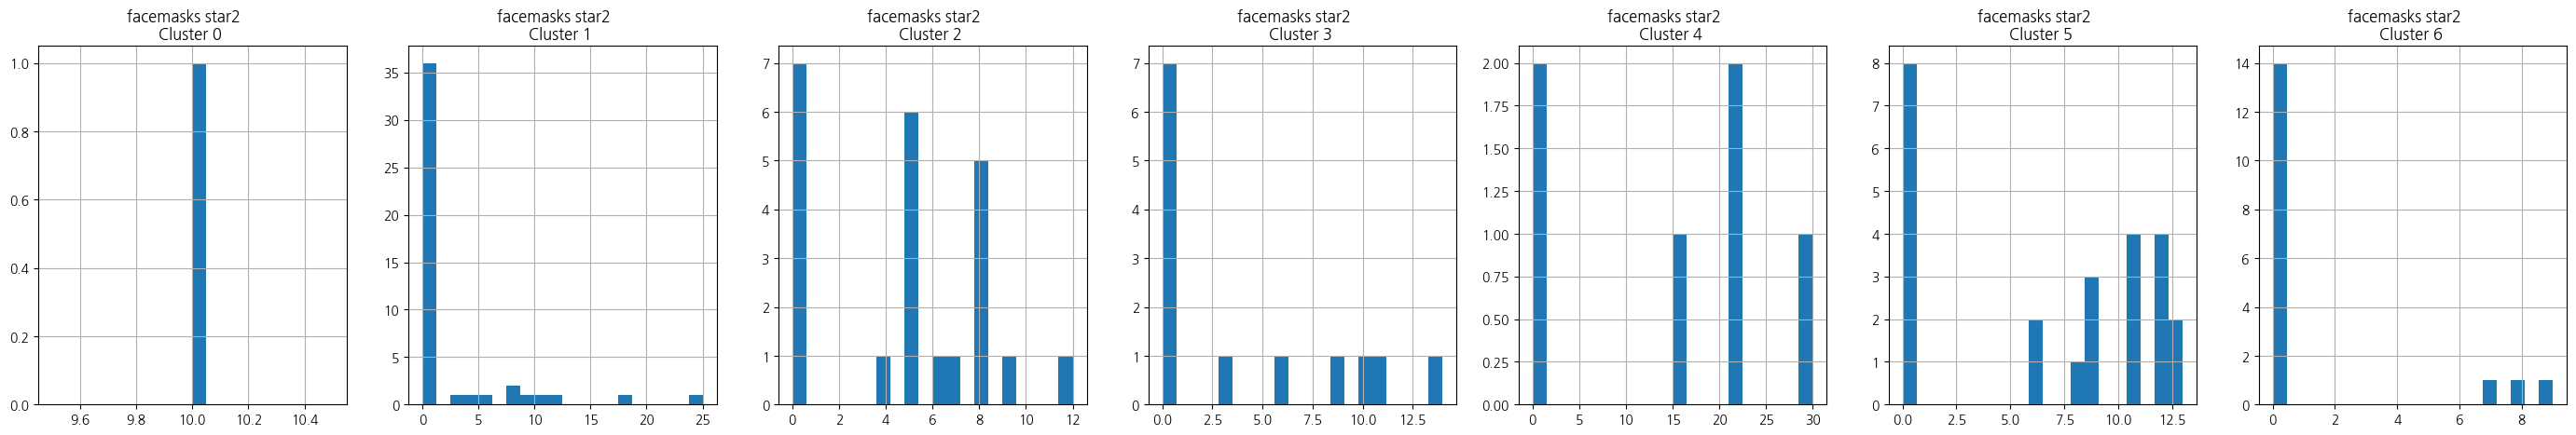

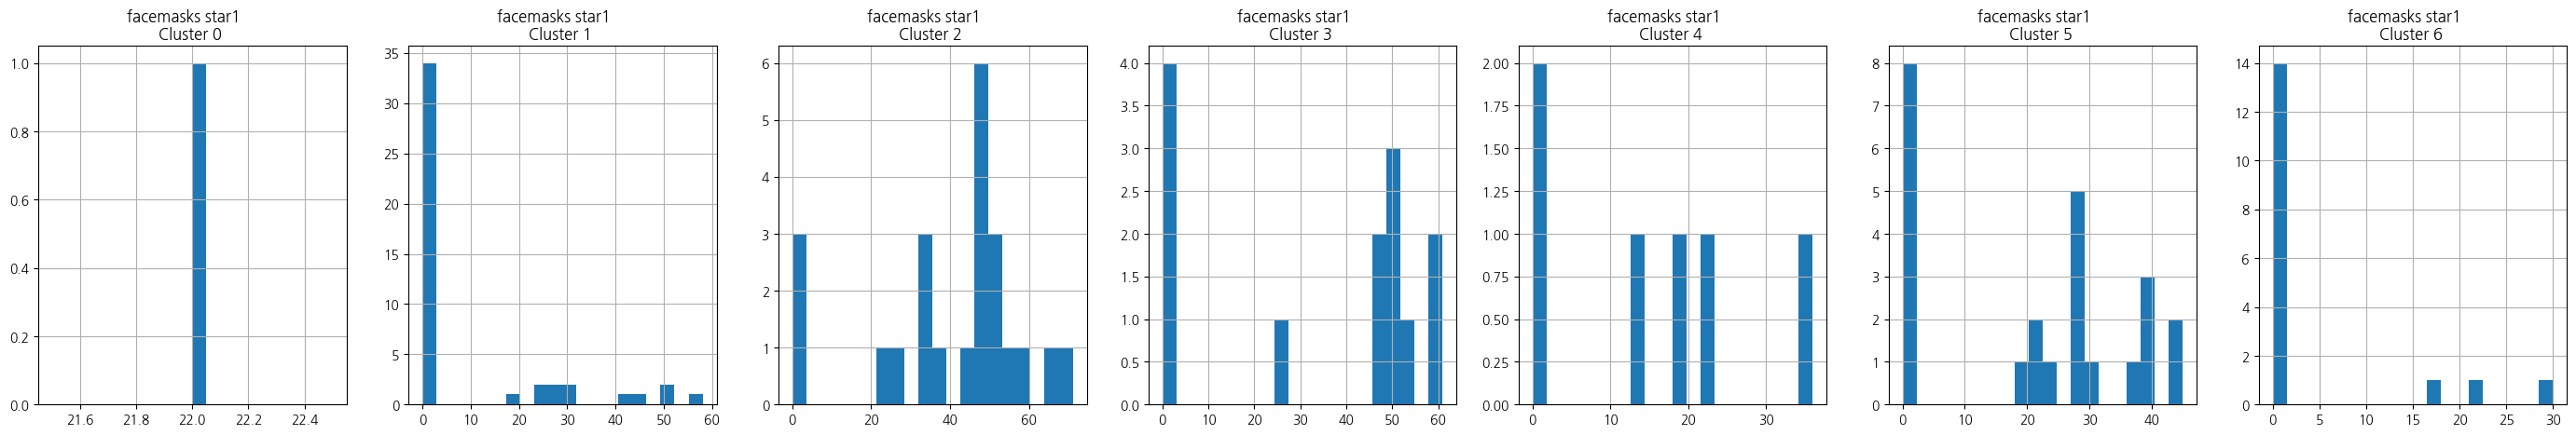

Skin Care


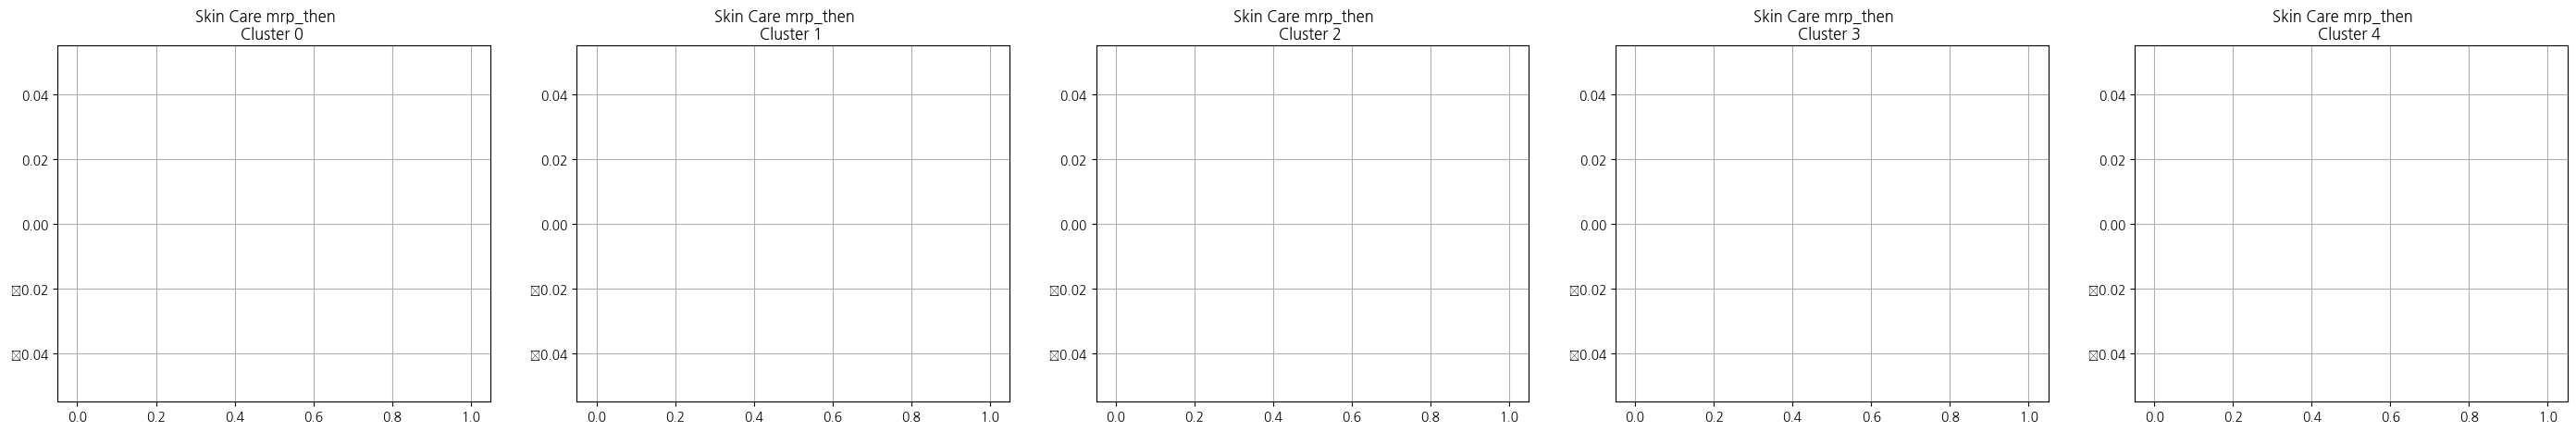

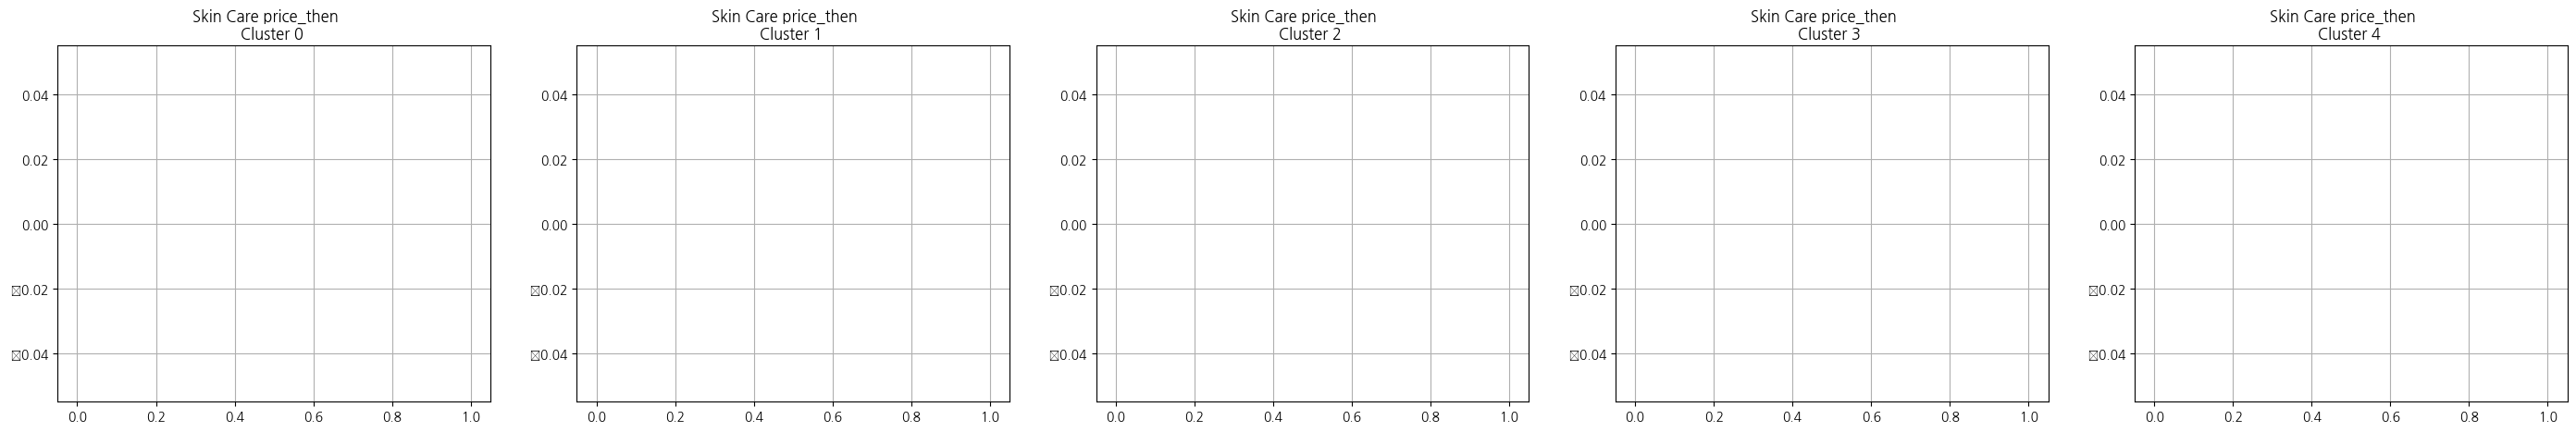

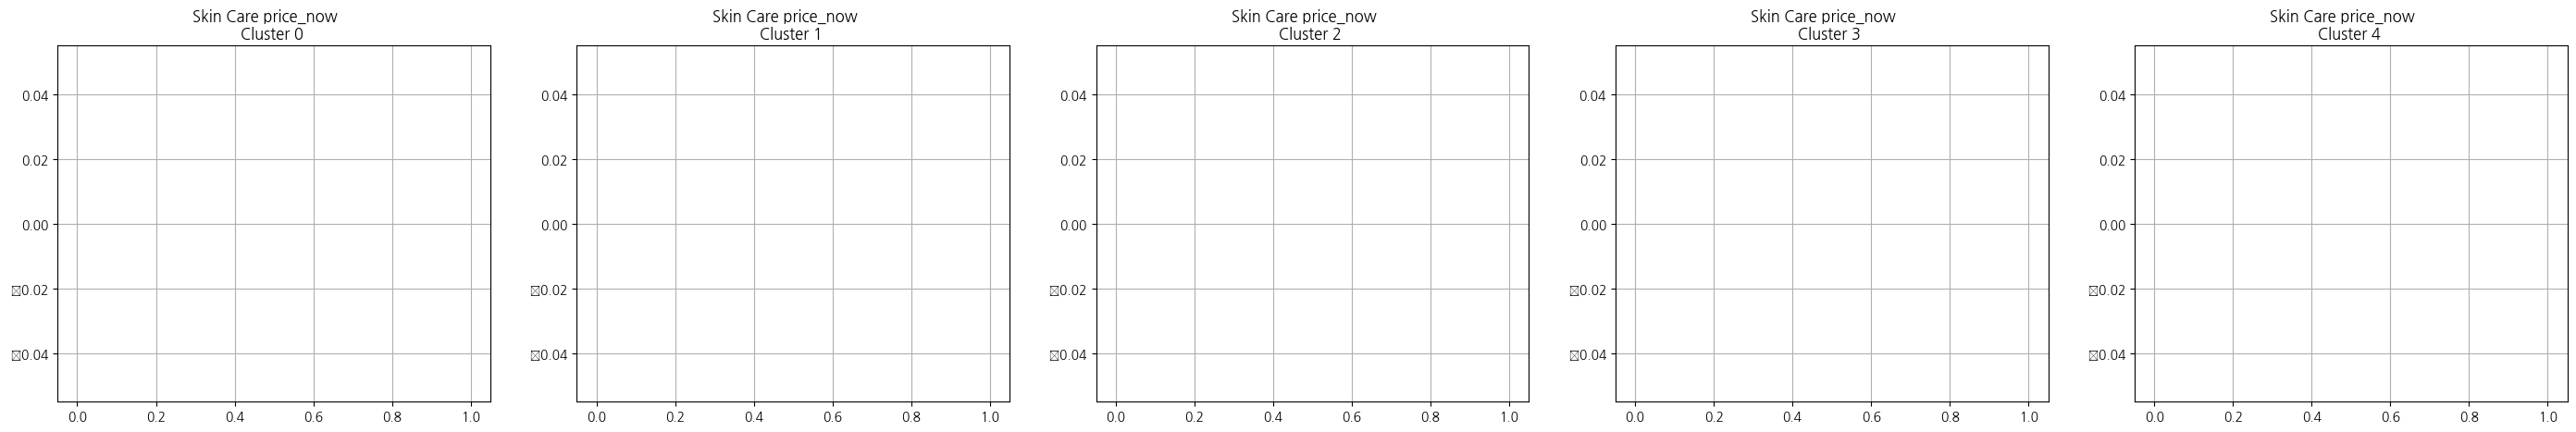

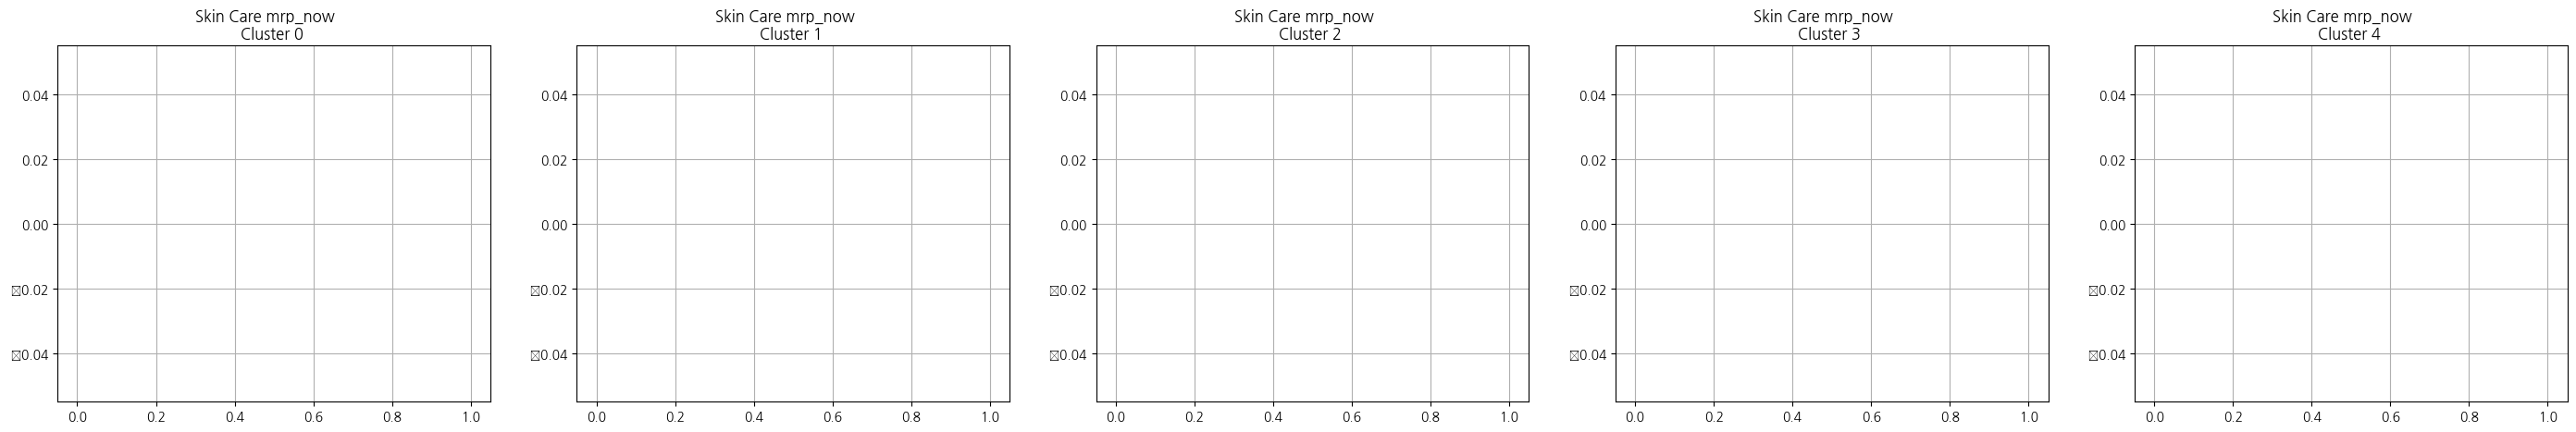

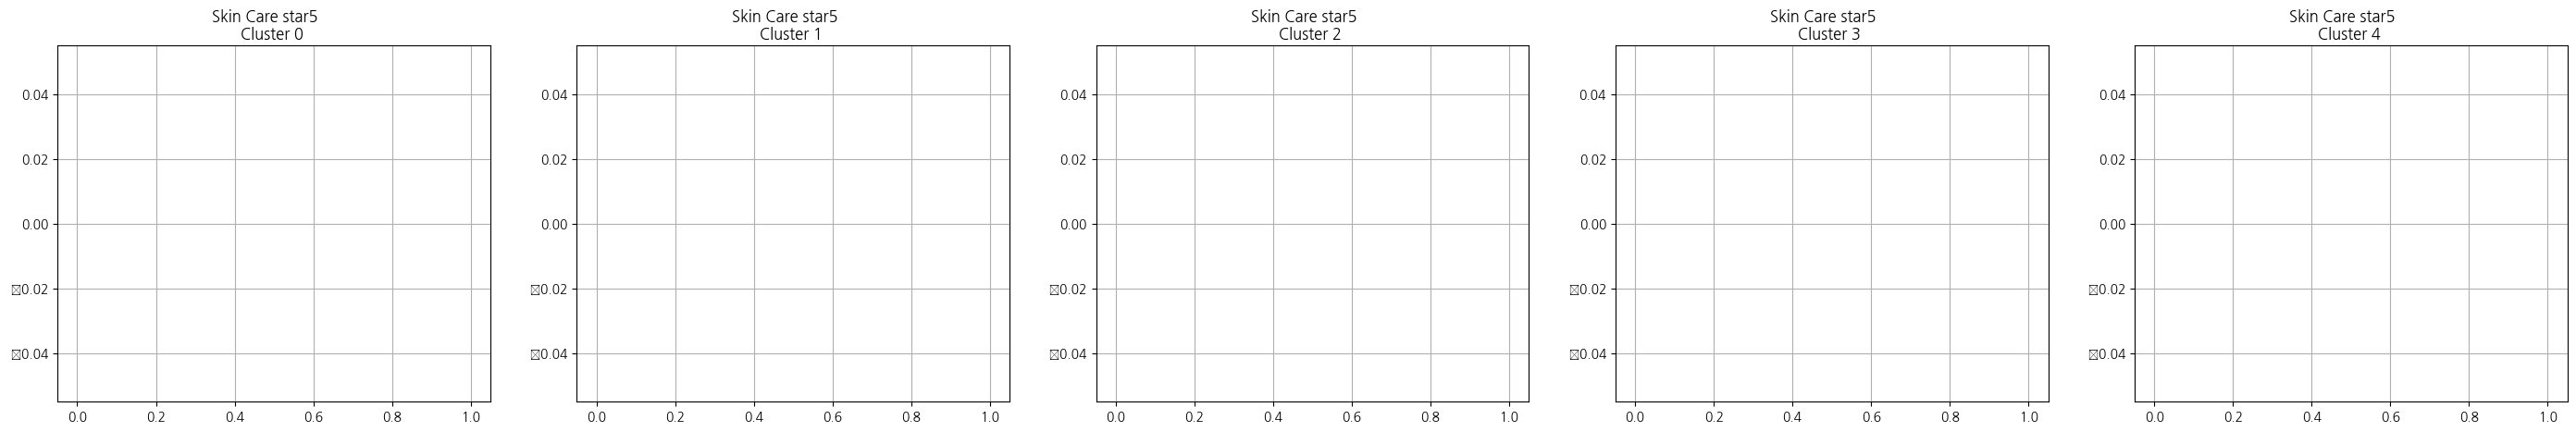

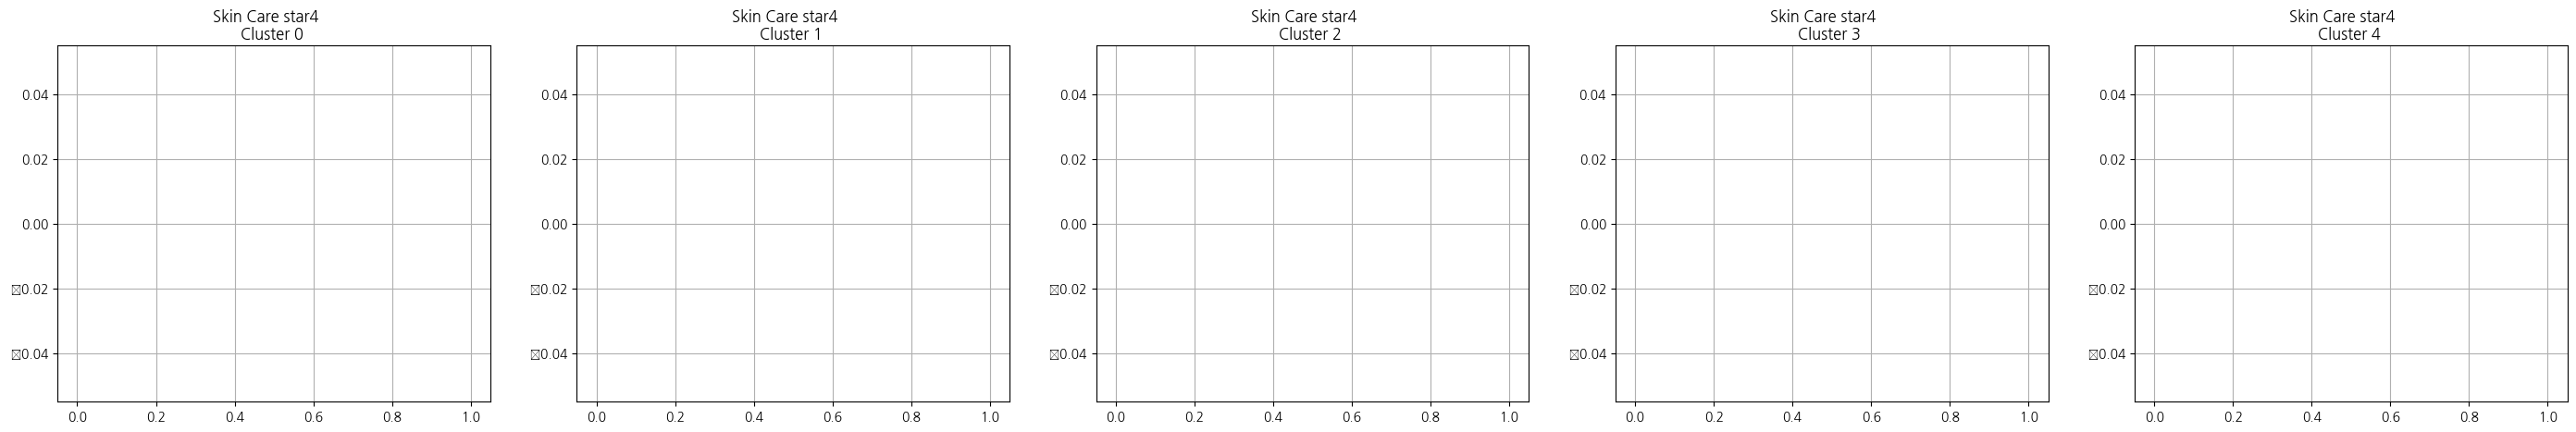

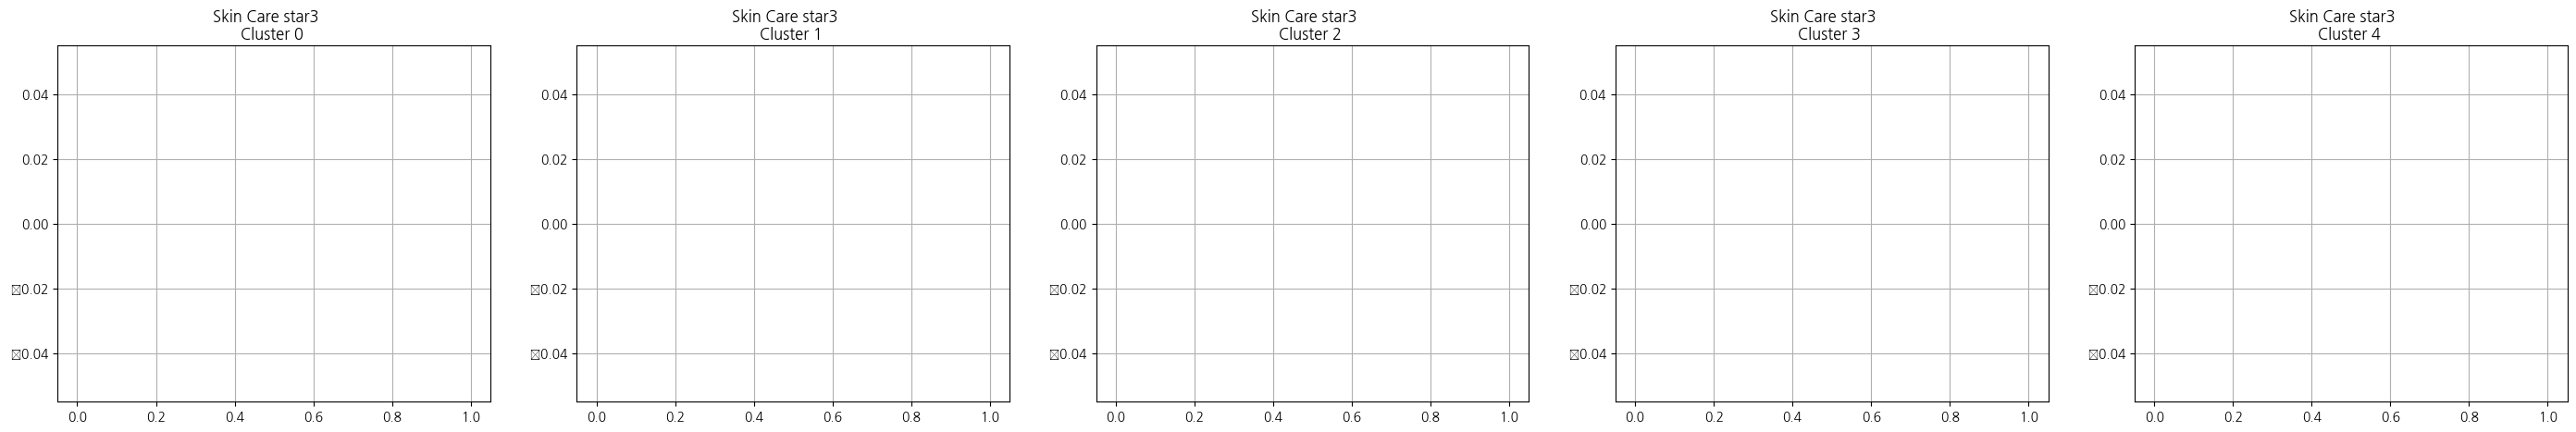

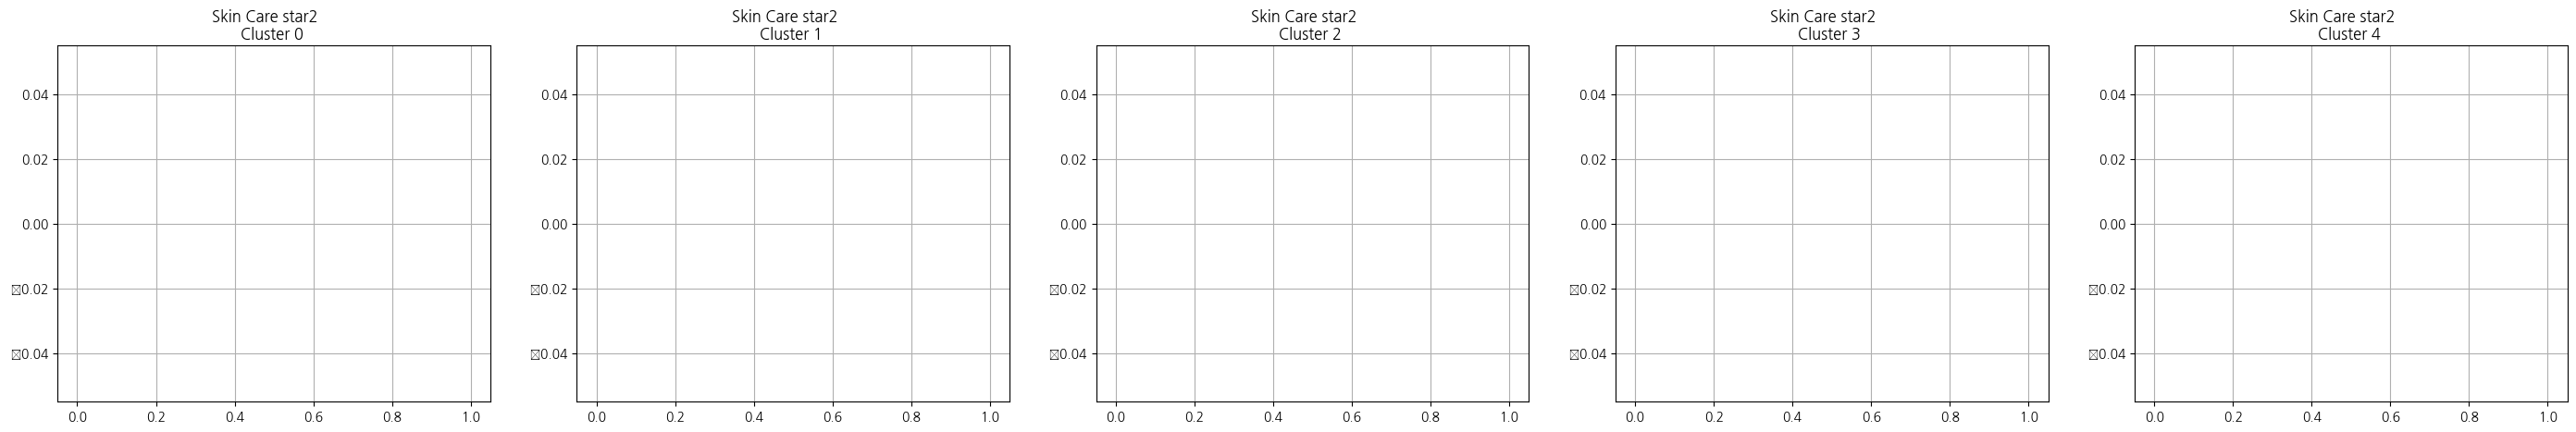

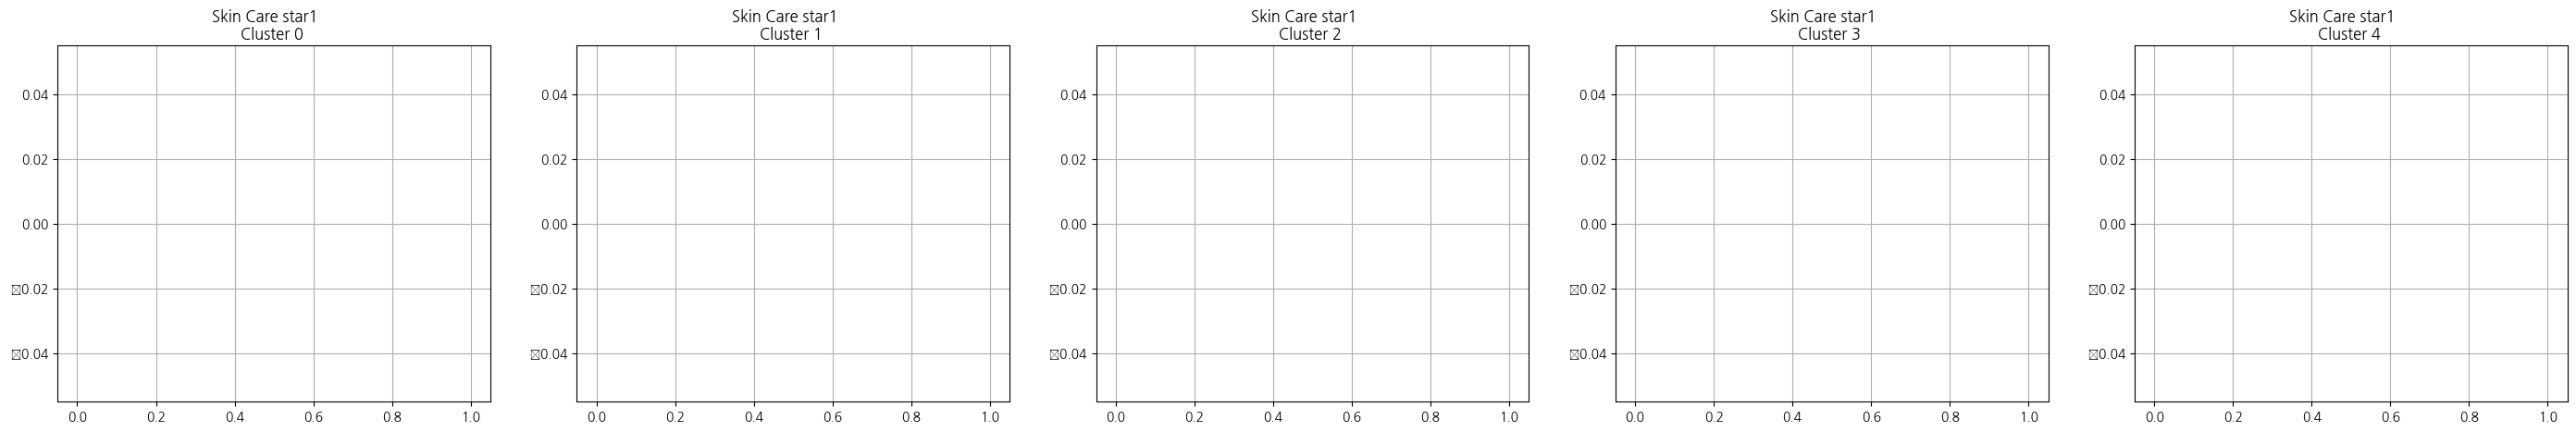

medical equipment


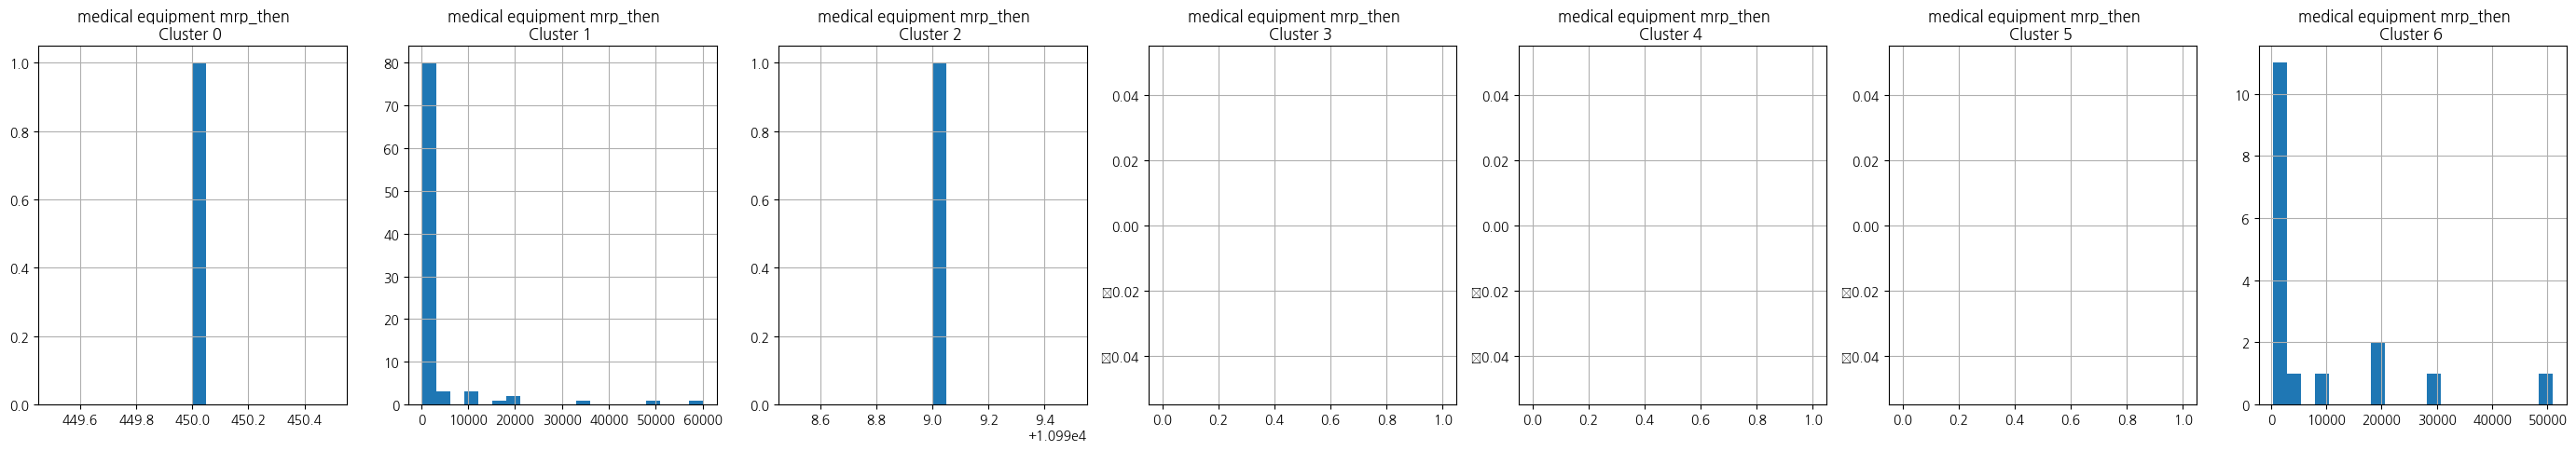

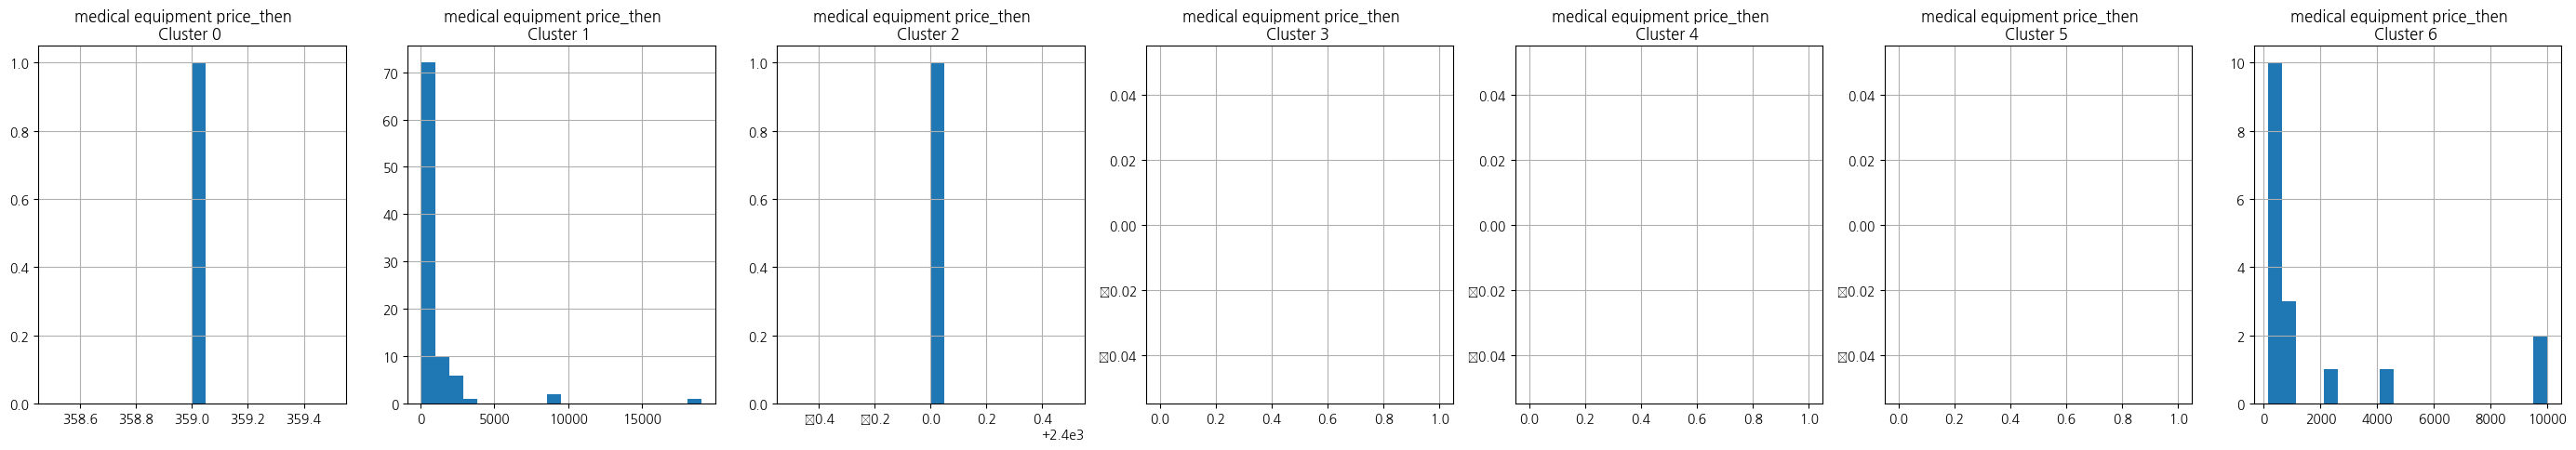

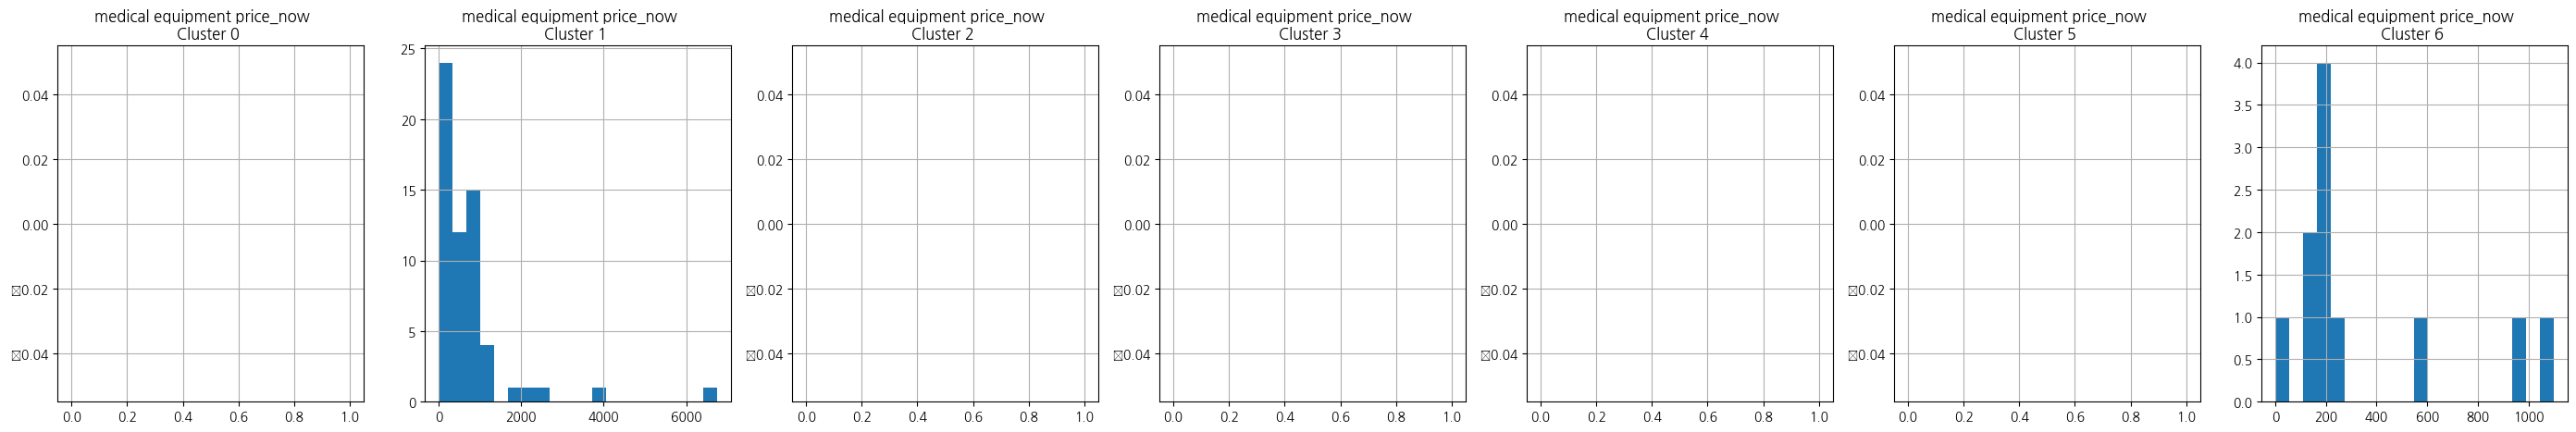

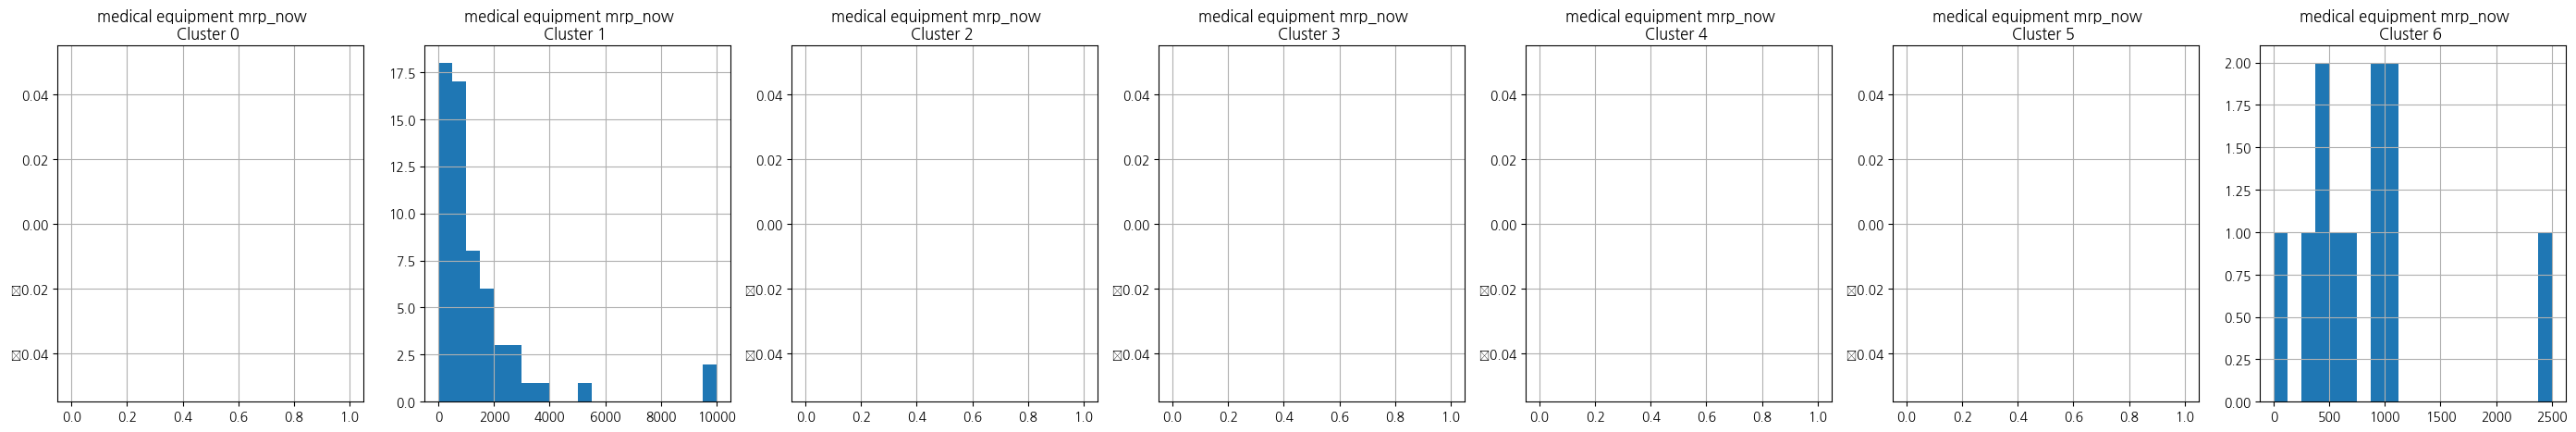

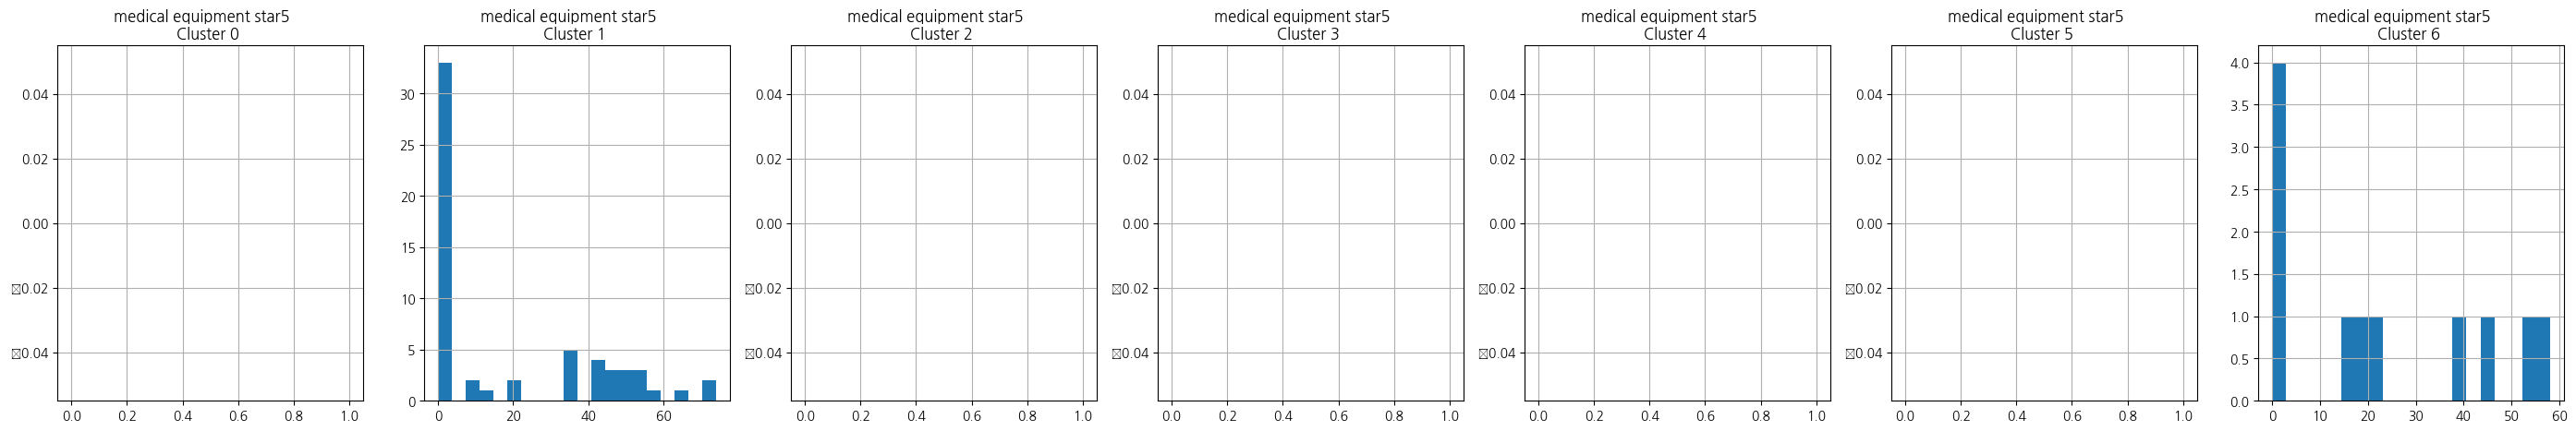

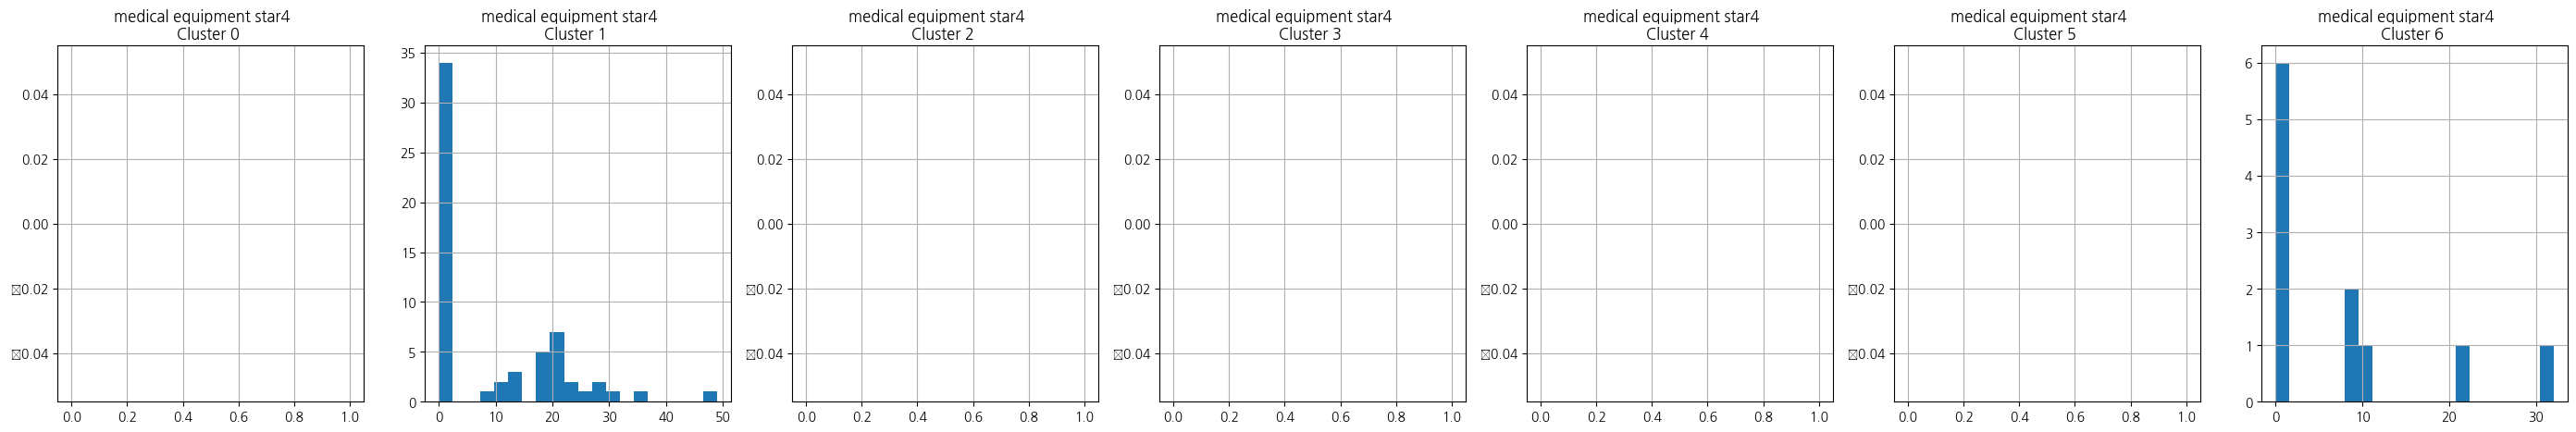

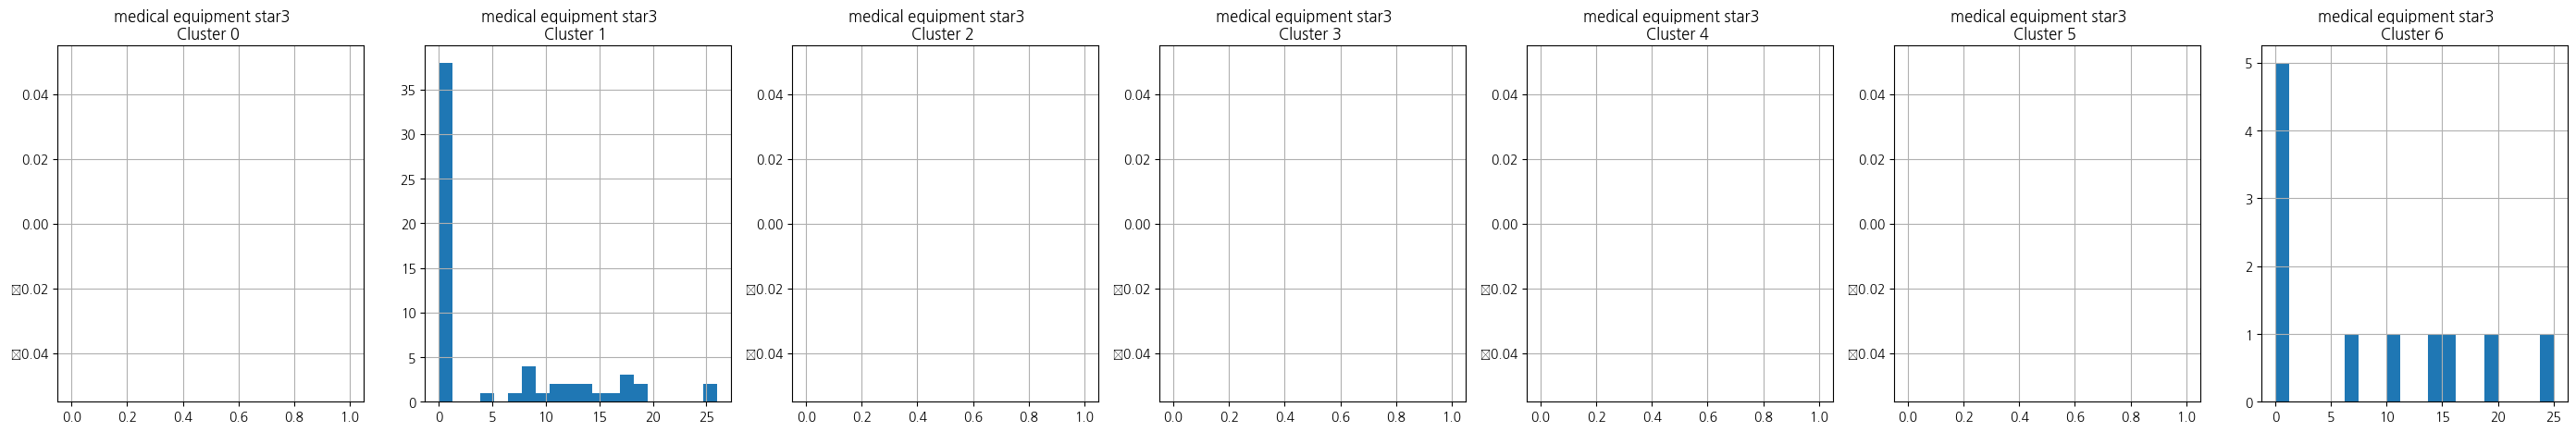

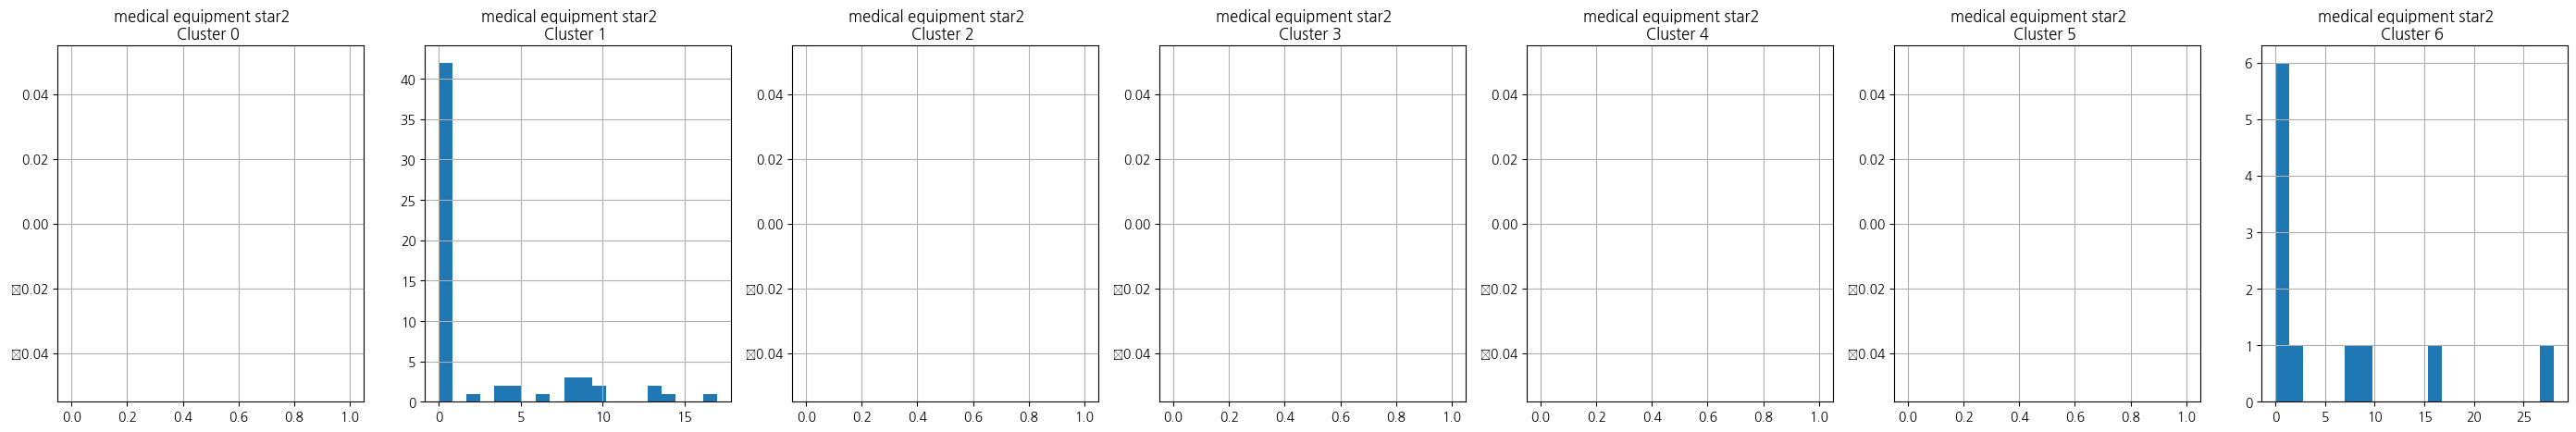

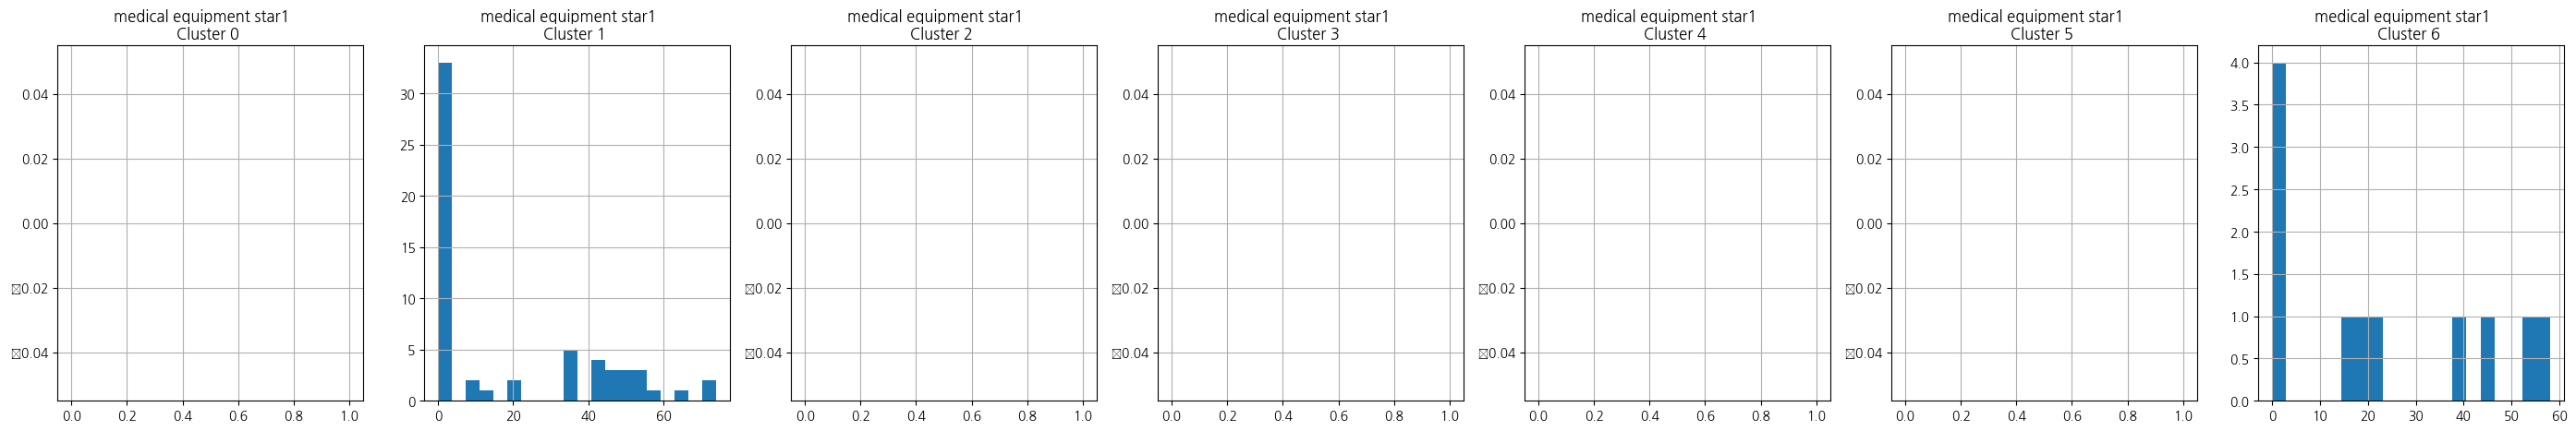

In [31]:
columnsss_amz=['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']
kmeans_dict_amz={'medical equipment':7,'Skin Care': 5, 'facemasks':7}
labels_dict_amz={}
for prd in list(valid_prd_list):
    print(prd)
    df_scaled = scaler.fit_transform(amz_all[columnsss_amz][amz_all['product']==prd])
    df_scaled=np.nan_to_num(df_scaled)
    kmeans = KMeans(kmeans_dict_amz[prd])
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    labels_dict_amz[prd]=labels
    cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columnsss_amz)
    df_cluster = pd.concat([amz_all[columnsss_amz][amz_all['product']==prd], pd.DataFrame({'cluster':labels})], axis = 1)
    for j in columnsss_amz:
        plt.figure(figsize = (35, 5))
        for k in range(kmeans_dict_amz[prd]):
            plt.subplot(1,kmeans_dict_amz[prd],k+1)
            cluster = df_cluster[df_cluster['cluster'] == k]
            cluster[j].hist(bins = 20)
            plt.title(prd+' {}    \nCluster {} '.format(j,k))

        plt.show()

In [32]:
amz_all[['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']].head()

,mrp_then,price_then,price_now,mrp_now,star5,star4,star3,star2,star1
0,NaN,NaN,151.0,1000.0,24.0,14.0,13.0,9.0,24.0
1,NaN,NaN,324.0,499.0,27.0,17.0,15.0,12.0,27.0
2,NaN,NaN,249.0,349.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,799.0,898.0,61.0,25.0,6.0,3.0,61.0
4,NaN,NaN,121.0,399.0,19.0,16.0,14.0,11.0,19.0


## 2.3 클러스터-PCA 분석

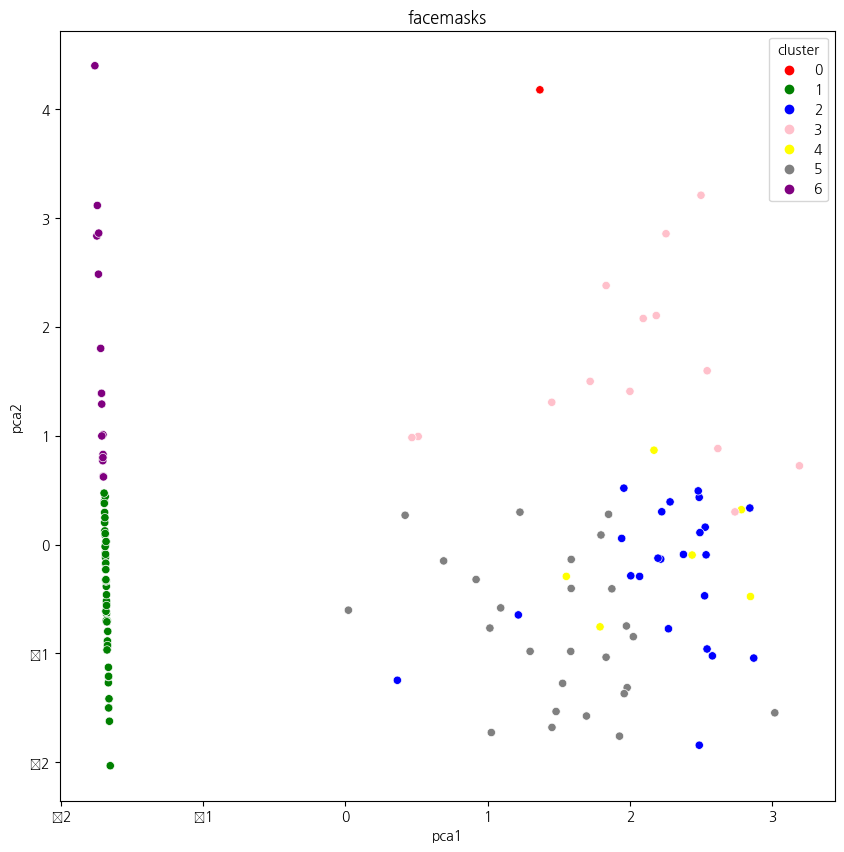

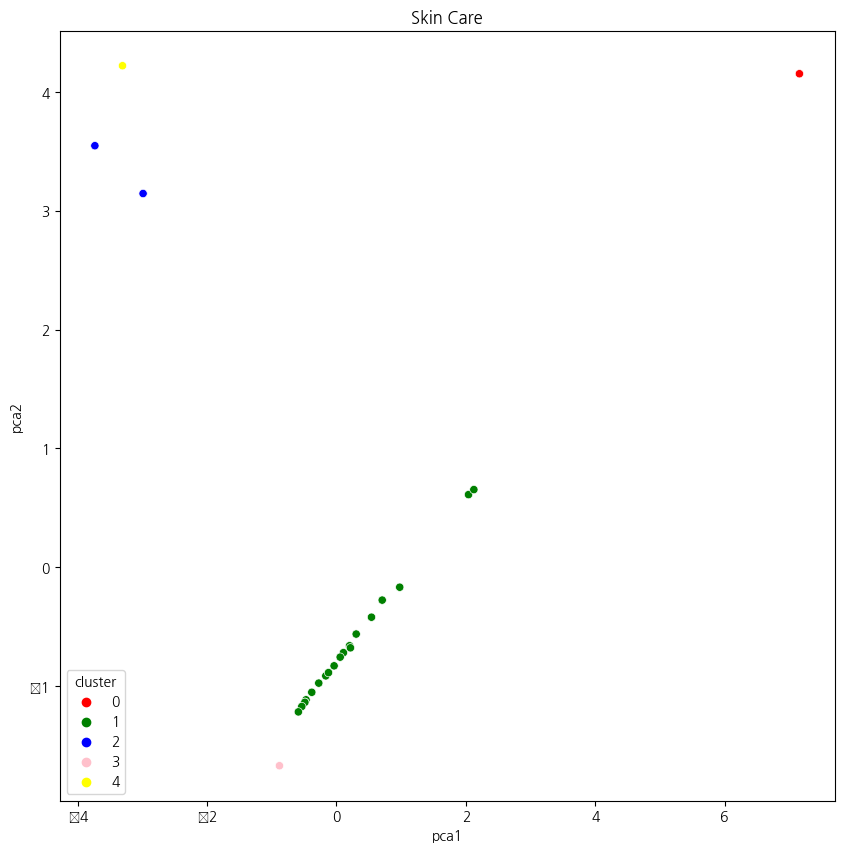

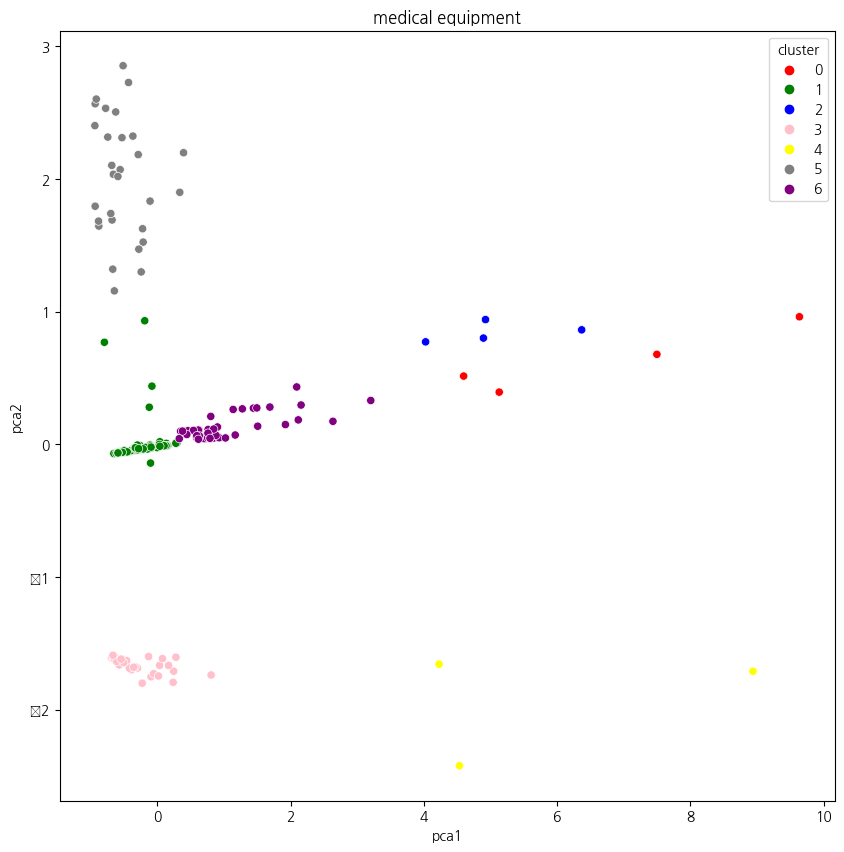

In [33]:
palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black', 'magenta', 'cyan']

for prd in valid_prd_list:
    # 필터링된 데이터를 가져옵니다.
    product_data = amz_all[['mrp_then', 'price_then', 'price_now', 'mrp_now', 'star5', 'star4', 'star3', 'star2', 'star1']][amz_all['product'] == prd]

    # 데이터가 비어있지 않다면 스케일링을 진행합니다.
    if not product_data.empty:
        df_scaled = scaler.fit_transform(product_data)
        df_scaled = np.nan_to_num(df_scaled)

        pca = PCA(n_components=2)
        principal_comp = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
        pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_dict_amz[prd]})], axis=1)

        plt.figure(figsize=(10, 10))
        ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=palette[:kmeans_dict_amz[prd]])
        plt.title(prd)
        plt.show()
    else:
        print(f"No data for product: {prd}")


# 3.구매 선호도 예측 분석

In [34]:
buyability=[]
for i in range(amz_all.shape[0]):
    averaged_score = (amz_all['star1'][i]*(1/15))+(amz_all['star2'][i]*(2/15))+(amz_all['star3'][i]*(3/15))+(amz_all['star4'][i]*(4/15))+(amz_all['star5'][i]*(5/15))
    try:
        averaged_score=int(averaged_score)
    except:
        averaged_score=0
    buyability.append(averaged_score)

amz_all['buyability']=buyability

## 3.1 결측값 처리

<Axes: >

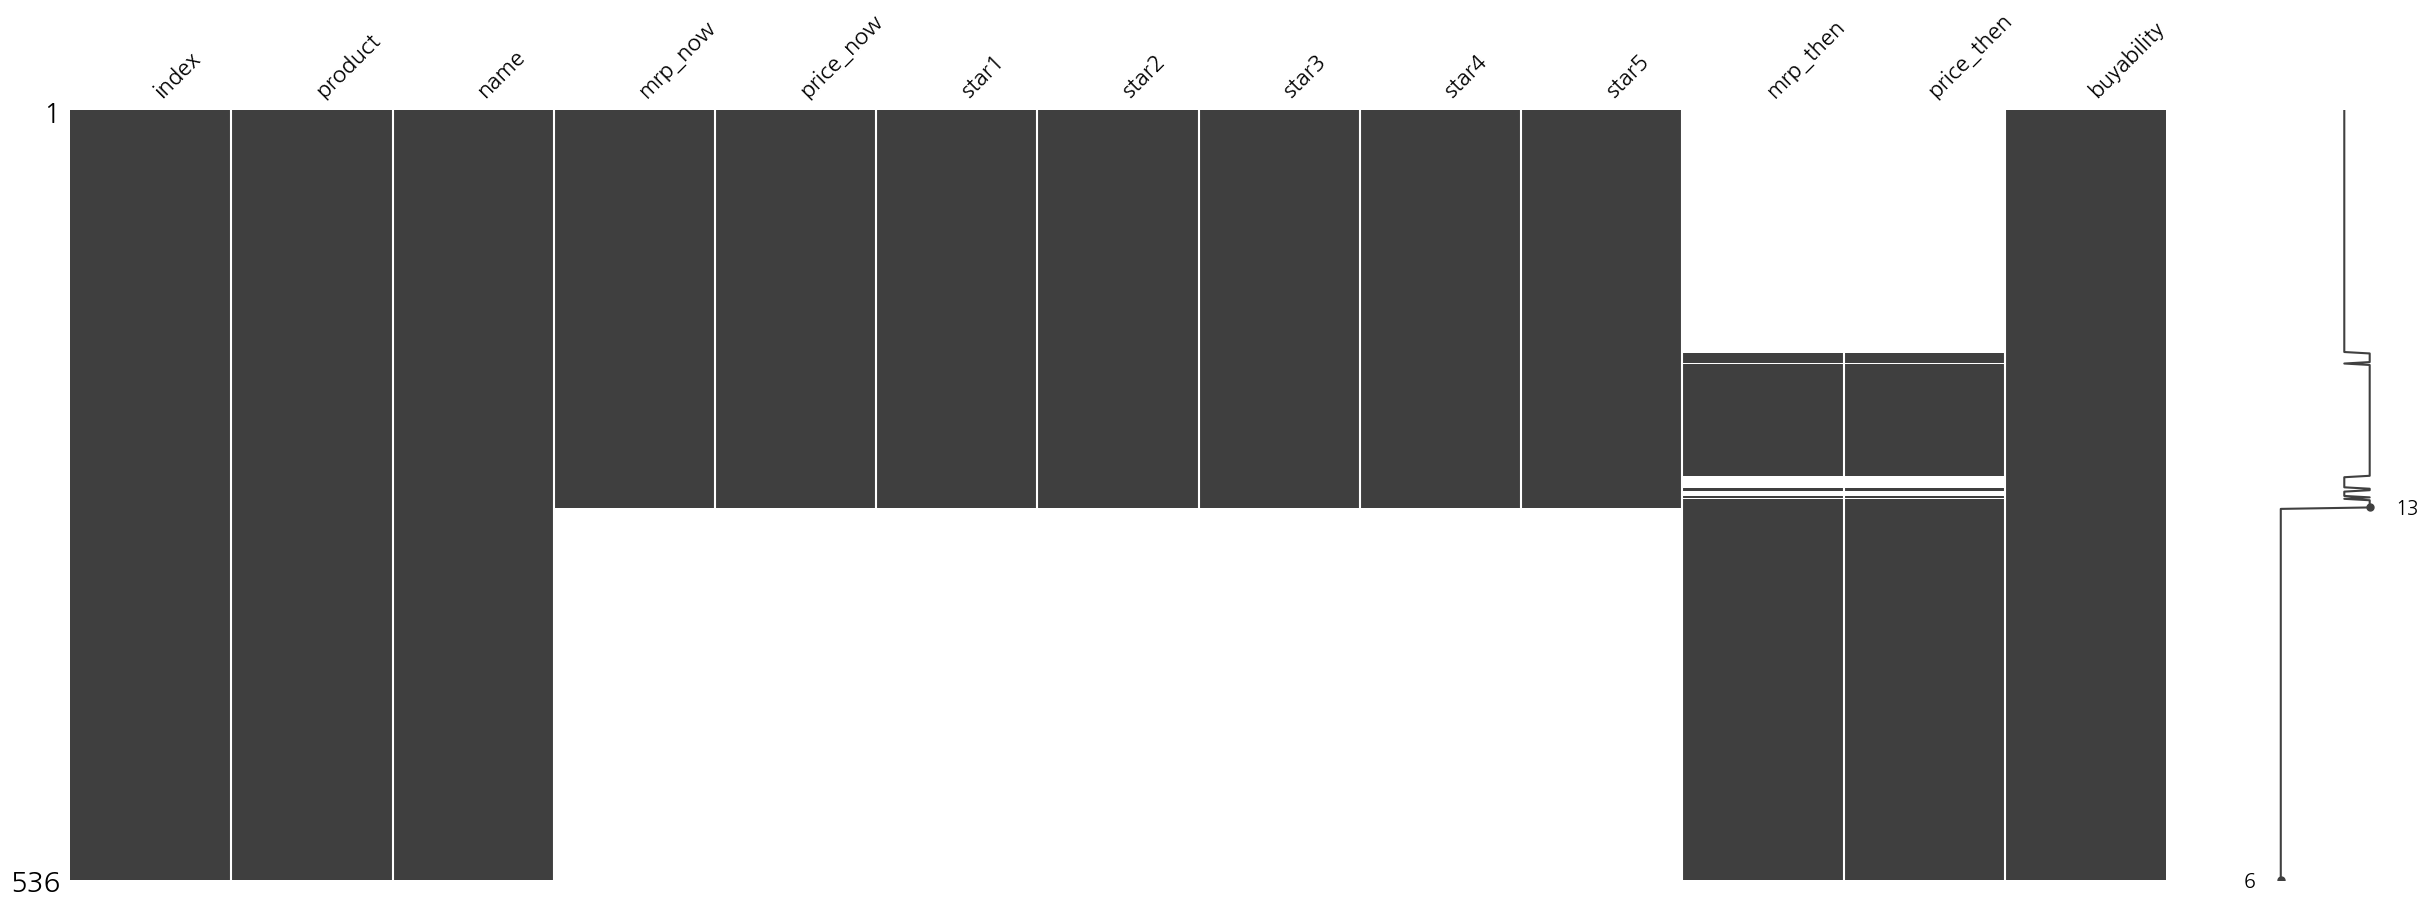

In [35]:
missingno.matrix(amz_all, figsize = (30,10))

In [36]:
amz_all.fillna(0, inplace = True)

<Axes: >

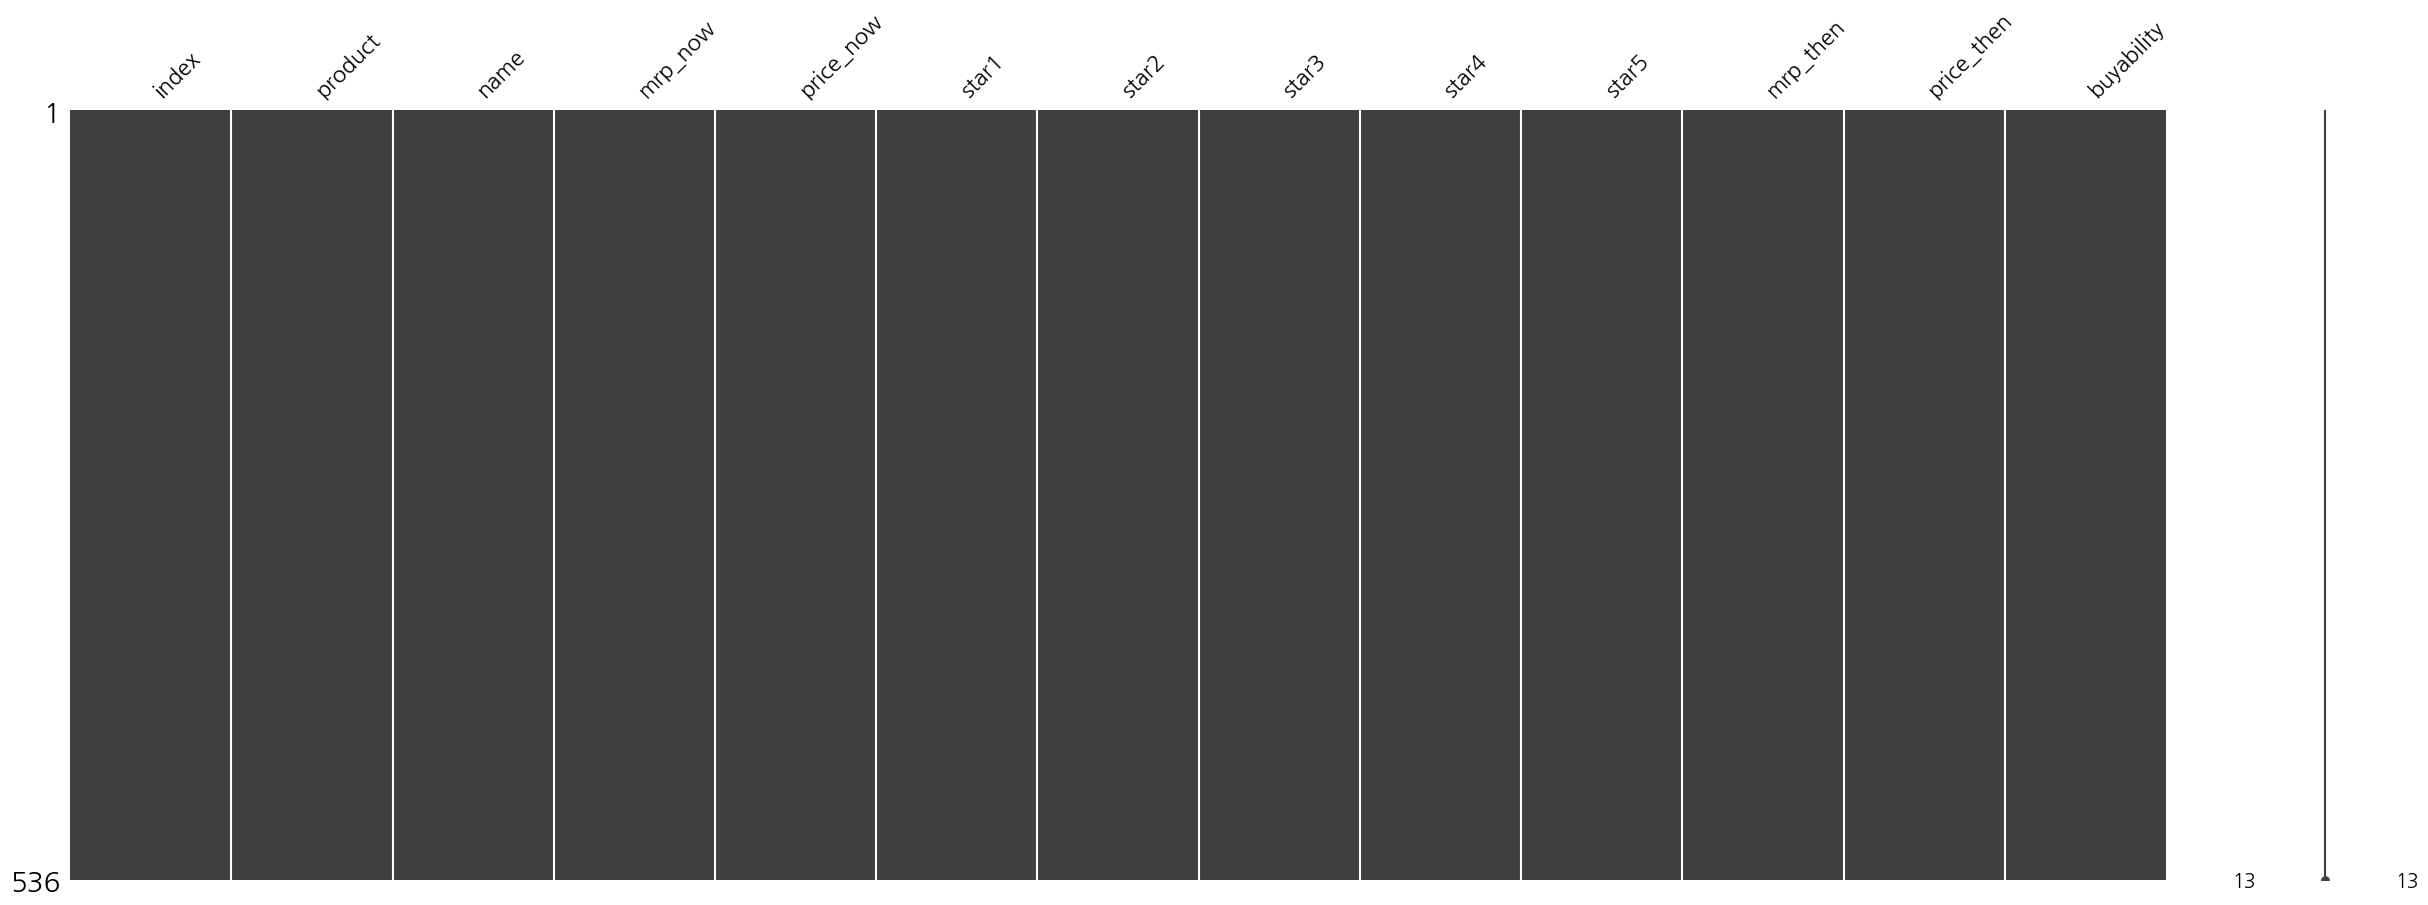

In [37]:
missingno.matrix(amz_all, figsize = (30,10))

## 3.2 데이터 준비

In [38]:
X=amz_all[amz_all.columns[2:-1]]
y=amz_all['buyability']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)

In [39]:
X_train = X_train.drop(['name'], axis=1, errors='ignore')
x_test = x_test.drop(['name'], axis=1, errors='ignore')

In [40]:
y_test

493     0
270    17
293     0
336     0
519     0
       ..
500     0
366     0
346     0
142     0
60     30
Name: buyability, Length: 179, dtype: int64

## 3.3 Logistic Regression

In [41]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7932960893854749


## 3.4 SVM

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:5,:]

array([[-0.16718068, -0.32321323,  1.18670829,  2.64693159,  2.77527509,
         1.537597  ,  1.18670829, -0.32253725, -0.42091205],
       [-0.5486876 , -0.0477379 , -0.44715562, -0.37611691, -0.41219903,
        -0.43569042, -0.44715562, -0.32253725, -0.42091205],
       [-0.5486876 , -0.50609182, -0.44715562, -0.37611691, -0.41219903,
        -0.43569042, -0.44715562,  7.80232896, 11.56910237],
       [ 0.08800789,  0.40598617,  1.79184307,  1.63924876,  1.53570182,
         2.11797565,  1.79184307, -0.32253725, -0.42091205],
       [-0.5486876 , -0.50609182, -0.44715562, -0.37611691, -0.41219903,
        -0.43569042, -0.44715562, -0.23387303, -0.23059437]])

In [43]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [44]:
y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.8263305322128851


In [45]:
for k in ('linear', 'poly','rbf','sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.9411764705882353
poly
0.957983193277311
rbf
0.876750700280112
sigmoid
0.8263305322128851


## 3.5 Best Model

In [46]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [47]:
X_test = scaler.transform(x_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8324022346368715
